# Vehicle Insurance Claim Fraud Detection (Classification)
__Author__ : Mohammad Rouintan , 400222042

__Course__ : Undergraduate Machine Learning Course

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Preprocessing Data

In [2]:
# Read Data
vic = pd.read_csv('Datasets/fraud_oracle.csv')
vic.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [3]:
vic.shape

(15420, 33)

In [4]:
vic.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


This dataset has 9 numerical features

In [5]:
vic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [6]:
# Checking Data for find missing value
vic.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [7]:
vic.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [8]:
vic.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

In [9]:
vic_temp = vic.copy()

In [10]:
vic_temp[vic_temp['Age'] == 0].shape

(320, 33)

In [11]:
vic_temp[vic_temp['Age'] == 0]['AgeOfPolicyHolder'].value_counts()

16 to 17    320
Name: AgeOfPolicyHolder, dtype: int64

In [12]:
# Because 320 of the samples have an age of zero, we fill them with the mean of 16 and 17
vic_temp['Age'] = vic_temp['Age'].replace(0, 16.5)

In [13]:
vic_temp[vic_temp['DayOfWeekClaimed'] == '0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [14]:
# Because Day Of Week Claimed and Month Claimed of above sample is 0 we remove it.
vic_temp.drop(1516, axis=0, inplace=True)
vic_temp.shape

(15419, 33)

In [15]:
vic_temp['PolicyNumber'].value_counts()

1        1
10361    1
10273    1
10274    1
10275    1
        ..
5146     1
5147     1
5148     1
5149     1
15420    1
Name: PolicyNumber, Length: 15419, dtype: int64

In [16]:
# Beacuse Policy number is a row number remove this column
vic_temp.drop(columns='PolicyNumber', inplace=True)
vic_temp.shape

(15419, 32)

In [17]:
corr_mat = vic_temp.corr()
corr_mat

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,RepNumber,Deductible,DriverRating,Year
WeekOfMonth,1.000000,0.275366,-0.007719,-0.011872,0.005340,-0.004000,-0.016834,-0.003949
WeekOfMonthClaimed,0.275366,1.000000,0.001411,-0.005783,0.009033,0.005442,-0.000086,0.012082
Age,-0.007719,0.001411,1.000000,-0.027509,-0.006357,0.069036,0.001264,0.022278
FraudFound_P,-0.011872,-0.005783,-0.027509,1.000000,-0.007529,0.017345,0.007259,-0.024778
RepNumber,0.005340,0.009033,-0.006357,-0.007529,1.000000,0.000525,0.011072,0.009438
Deductible,-0.004000,0.005442,0.069036,0.017345,0.000525,1.000000,0.003882,-0.001182
DriverRating,-0.016834,-0.000086,0.001264,0.007259,0.011072,0.003882,1.000000,-0.013922
Year,-0.003949,0.012082,0.022278,-0.024778,0.009438,-0.001182,-0.013922,1.000000


/var/folders/9y/vw5physn1xj4wpb41wh0q6gh0000gn/T/ipykernel_86675/3087650146.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_mat = corr_mat.where(np.tril(np.ones(corr_mat.shape)).astype(np.bool))


<AxesSubplot:>

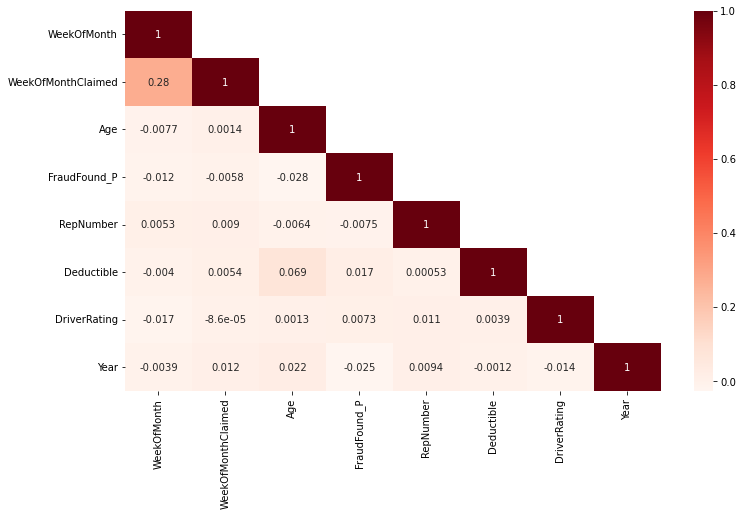

In [18]:
plt.figure(figsize=(12, 7))
corr_mat = corr_mat.where(np.tril(np.ones(corr_mat.shape)).astype(np.bool))
sns.heatmap(corr_mat, annot=True, cmap='Reds')

In [19]:
for labels, content in vic_temp.items():
    if pd.api.types.is_string_dtype(content):
        vic_temp[labels] = content.astype('category').cat.as_ordered()

In [20]:
vic_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15419 entries, 0 to 15419
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Month                 15419 non-null  category
 1   WeekOfMonth           15419 non-null  int64   
 2   DayOfWeek             15419 non-null  category
 3   Make                  15419 non-null  category
 4   AccidentArea          15419 non-null  category
 5   DayOfWeekClaimed      15419 non-null  category
 6   MonthClaimed          15419 non-null  category
 7   WeekOfMonthClaimed    15419 non-null  int64   
 8   Sex                   15419 non-null  category
 9   MaritalStatus         15419 non-null  category
 10  Age                   15419 non-null  float64 
 11  Fault                 15419 non-null  category
 12  PolicyType            15419 non-null  category
 13  VehicleCategory       15419 non-null  category
 14  VehiclePrice          15419 non-null  category
 15  Fr

In [21]:
for labels, content in vic_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        vic_temp[labels] = pd.Categorical(content).codes

In [22]:
vic_temp.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,2,5,6,6,1,5,4,1,0,2,...,1,3,0,0,0,3,0,2,1994,2
1,4,3,6,6,1,1,4,4,1,2,...,4,4,1,0,0,3,3,0,1994,1
2,10,5,0,6,1,4,9,2,1,1,...,5,6,0,0,0,3,3,0,1994,1
3,6,2,2,17,0,0,5,1,1,1,...,6,7,1,0,0,2,3,0,1994,2
4,4,5,1,6,1,5,3,2,0,2,...,3,4,0,0,0,3,3,0,1994,1


In [23]:
vic_temp.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,15419.0,5.532136,3.409703,0.0,3.0,6.0,8.0,11.0
WeekOfMonth,15419.0,2.788637,1.287611,1.0,2.0,3.0,4.0,5.0
DayOfWeek,15419.0,2.915883,2.055494,0.0,1.0,3.0,5.0,6.0
Make,15419.0,10.114858,5.282987,0.0,6.0,9.0,13.0,18.0
AccidentArea,15419.0,0.896426,0.304716,0.0,1.0,1.0,1.0,1.0
DayOfWeekClaimed,15419.0,3.203061,2.273766,0.0,1.0,4.0,5.0,6.0
MonthClaimed,15419.0,5.596148,3.410648,0.0,3.0,6.0,9.0,11.0
WeekOfMonthClaimed,15419.0,2.694079,1.259082,1.0,2.0,3.0,4.0,5.0
Sex,15419.0,0.843051,0.363765,0.0,1.0,1.0,1.0,1.0
MaritalStatus,15419.0,1.303327,0.475113,0.0,1.0,1.0,2.0,3.0


In [24]:
corr_mat = vic_temp.corr()
corr_mat

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
Month,1.000000,0.010625,-0.009549,0.000539,-0.000074,-0.025776,0.724419,0.042016,0.002916,-0.003956,...,-0.029181,0.010748,0.009986,-0.002107,0.015757,-0.010878,-0.007517,0.001341,0.028726,0.020484
WeekOfMonth,0.010625,1.000000,-0.011668,-0.001665,0.009002,0.015082,0.009982,0.275366,0.005332,0.019671,...,-0.014871,-0.002898,0.013020,0.013711,0.006472,-0.002867,0.008338,0.002511,-0.003949,-0.007818
DayOfWeek,-0.009549,-0.011668,1.000000,0.003321,0.006386,0.097647,-0.011997,-0.013954,-0.021214,-0.006547,...,0.004027,0.013165,-0.011908,0.000134,0.011516,-0.010873,-0.005148,0.001991,0.002549,0.014810
Make,0.000539,-0.001665,0.003321,1.000000,0.004127,-0.005187,0.010022,-0.007900,-0.026360,-0.010574,...,-0.052875,0.051961,-0.008083,-0.000490,-0.014913,-0.025168,-0.003390,-0.000226,0.010826,-0.019937
AccidentArea,-0.000074,0.009002,0.006386,0.004127,1.000000,-0.011394,-0.002618,0.006330,-0.033732,0.003321,...,-0.012278,0.007301,0.001722,-0.028385,-0.005214,0.005229,0.003755,-0.007856,0.002079,0.043560
DayOfWeekClaimed,-0.025776,0.015082,0.097647,-0.005187,-0.011394,1.000000,-0.015803,0.013635,-0.000203,-0.018055,...,-0.006408,0.008432,-0.018389,-0.001396,-0.015393,0.019484,0.011260,-0.010448,0.003512,-0.014472
MonthClaimed,0.724419,0.009982,-0.011997,0.010022,-0.002618,-0.015803,1.000000,0.032428,-0.002160,-0.007772,...,-0.021446,0.018572,0.013989,-0.008597,0.016148,0.001483,-0.013373,-0.001811,0.020948,0.028162
WeekOfMonthClaimed,0.042016,0.275366,-0.013954,-0.007900,0.006330,0.013635,0.032428,1.000000,0.003777,0.000411,...,0.004001,0.001091,0.023497,0.009363,-0.011326,-0.007022,-0.008322,0.008224,0.012082,0.013671
Sex,0.002916,0.005332,-0.021214,-0.026360,-0.033732,-0.000203,-0.002160,0.003777,1.000000,-0.114441,...,0.209081,0.065569,-0.007408,-0.005583,0.012685,0.001927,0.004429,0.000089,0.000444,-0.069729
MaritalStatus,-0.003956,0.019671,-0.006547,-0.010574,0.003321,-0.018055,-0.007772,0.000411,-0.114441,1.000000,...,-0.304444,-0.453924,0.011780,0.013870,0.007592,0.016658,-0.009557,-0.008284,-0.013893,0.048131


/var/folders/9y/vw5physn1xj4wpb41wh0q6gh0000gn/T/ipykernel_86675/1290100022.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_mat = corr_mat.where(np.tril(np.ones(corr_mat.shape)).astype(np.bool))


<AxesSubplot:>

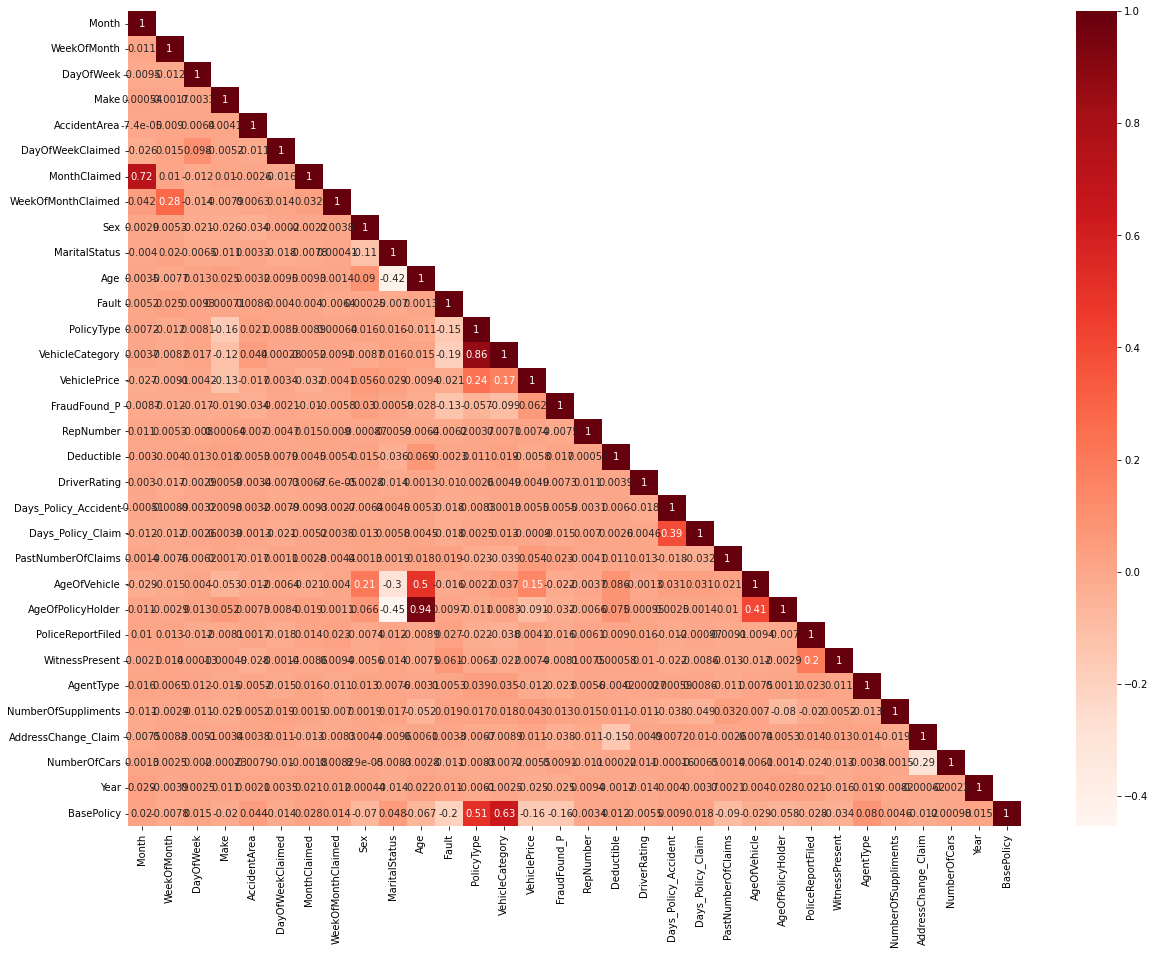

In [25]:
plt.figure(figsize=(20, 15))
corr_mat = corr_mat.where(np.tril(np.ones(corr_mat.shape)).astype(np.bool))
sns.heatmap(corr_mat, annot=True, cmap='Reds')

### Spliting Data

In [26]:
X = vic_temp.drop(columns='FraudFound_P').copy()
y = vic_temp['FraudFound_P'].copy()

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, stratify=y)

In [28]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(12335, 31) (3084, 31) (12335,) (3084,)


In [29]:
y_train.value_counts()

0    11597
1      738
Name: FraudFound_P, dtype: int64

In [30]:
y_test.value_counts()

0    2899
1     185
Name: FraudFound_P, dtype: int64

#### Functions for Analysis a Model

In [31]:
model_name_test, accuracy_test, recall_test, precision_test, f1_test, roc_auc_test = [], [], [], [], [], []

In [32]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay, classification_report

def analysis_model_with_test(modelname, model, x_test, y_test):
    y_pred = model.predict(x_test)

    model_name_test.append(modelname)
    accuracy_test.append(accuracy_score(y_test, y_pred))
    f1_test.append(f1_score(y_test, y_pred))
    recall_test.append(recall_score(y_test, y_pred))
    precision_test.append(precision_score(y_test, y_pred))
    roc_auc_test.append(roc_auc_score(y_test, y_pred))

    print('Accuracy Score:', accuracy_score(y_test, y_pred))
    print('F1 Score:', f1_score(y_test, y_pred))
    print('Recall Score:', recall_score(y_test, y_pred))
    print('Precision Score:', precision_score(y_test, y_pred))
    print('ROC AUC:', roc_auc_score(y_test, y_pred))

    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=conf_mat)

    # ROC AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)

    fig, ax = plt.subplots(1, 2, figsize=(11, 6))
    display.plot(ax=ax[0]), ax[0].set_title('Confusion Matrix')
    ax[1].plot(fpr, tpr), ax[1].set_title('ROC AUC'), ax[1].set_xlabel('False Positive Rate'), ax[1].set_ylabel('True Positive Rate')
    plt.show()
    print(classification_report(y_test, y_pred))

In [33]:
model_name_train, accuracy_train, recall_train, precision_train, f1_train, roc_auc_train = [], [], [], [], [], []

In [34]:
def analysis_model_with_train(modelname, model, x_train, y_train):
    y_pred = model.predict(x_train)

    model_name_train.append(modelname)
    accuracy_train.append(accuracy_score(y_train, y_pred))
    f1_train.append(f1_score(y_train, y_pred))
    recall_train.append(recall_score(y_train, y_pred))
    precision_train.append(precision_score(y_train, y_pred))
    roc_auc_train.append(roc_auc_score(y_train, y_pred))

    print('Accuracy Score:', accuracy_score(y_train, y_pred))
    print('F1 Score:', f1_score(y_train, y_pred))
    print('Recall Score:', recall_score(y_train, y_pred))
    print('Precision Score:', precision_score(y_train, y_pred))
    print('ROC AUC:', roc_auc_score(y_train, y_pred))

    # Confusion Matrix
    conf_mat = confusion_matrix(y_train, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
    # ROC AUC
    fpr, tpr, _ = roc_curve(y_train, y_pred)

    fig, ax = plt.subplots(1, 2, figsize=(11, 6))
    display.plot(ax=ax[0]), ax[0].set_title('Confusion Matrix')
    ax[1].plot(fpr, tpr), ax[1].set_title('ROC AUC'), ax[1].set_xlabel('False Positive Rate'), ax[1].set_ylabel('True Positive Rate')
    plt.show()
    print(classification_report(y_train, y_pred))

### Training Model Without under and over sampling

#### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
logistic_model = make_pipeline(StandardScaler(), LogisticRegression())

In [36]:
logistic_model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score: 0.9401702472638832
F1 Score: 0.0
Recall Score: 0.0
Precision Score: 0.0
ROC AUC: 0.5


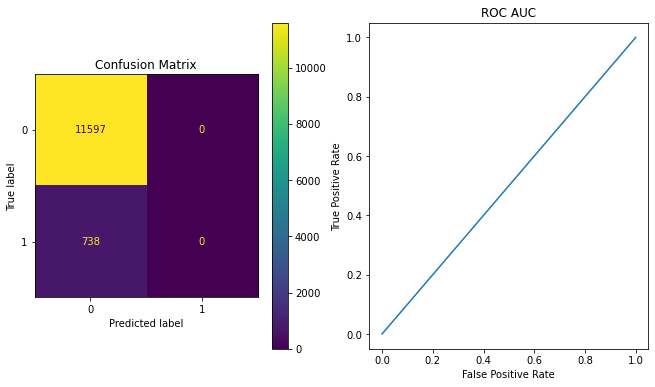

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11597
           1       0.00      0.00      0.00       738

    accuracy                           0.94     12335
   macro avg       0.47      0.50      0.48     12335
weighted avg       0.88      0.94      0.91     12335



/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
analysis_model_with_train('logistic_model', logistic_model, x_train, y_train)

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score: 0.9400129701686122
F1 Score: 0.0
Recall Score: 0.0
Precision Score: 0.0
ROC AUC: 0.5


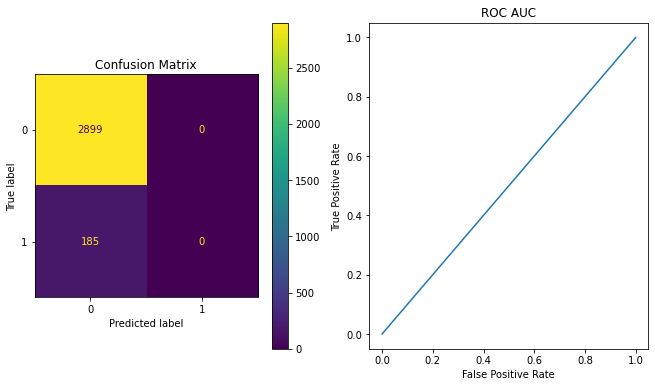

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.00      0.00      0.00       185

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084



/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
analysis_model_with_test('logistic_model', logistic_model, x_test, y_test)

### SVM Classifiers

#### LinearSVC

In [39]:
from sklearn.svm import LinearSVC
linearSVC_model = make_pipeline(StandardScaler(), LinearSVC(dual=False))

In [40]:
linearSVC_model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(dual=False))])

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score: 0.9401702472638832
F1 Score: 0.0
Recall Score: 0.0
Precision Score: 0.0
ROC AUC: 0.5


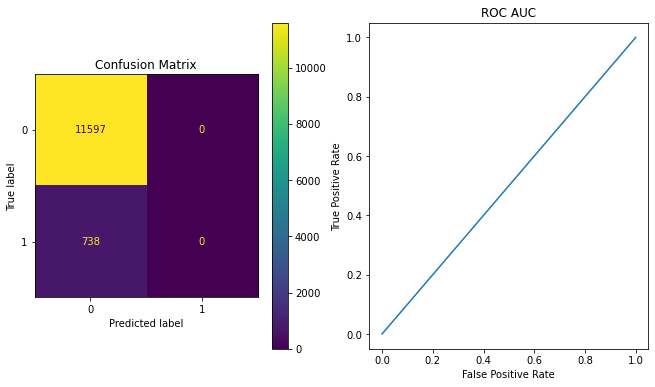

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11597
           1       0.00      0.00      0.00       738

    accuracy                           0.94     12335
   macro avg       0.47      0.50      0.48     12335
weighted avg       0.88      0.94      0.91     12335



/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
analysis_model_with_train('linearSVC_model', linearSVC_model, x_train, y_train)

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score: 0.9400129701686122
F1 Score: 0.0
Recall Score: 0.0
Precision Score: 0.0
ROC AUC: 0.5


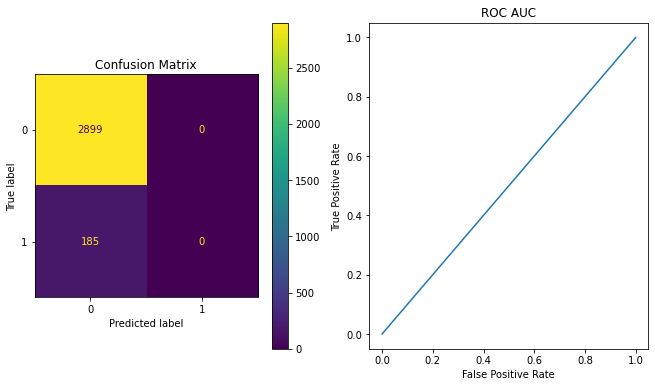

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.00      0.00      0.00       185

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084



/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
analysis_model_with_test('linearSVC_model', linearSVC_model, x_test, y_test)

#### SVC

In [43]:
from sklearn.svm import SVC
# Polynomial kernel
poly_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='poly', degree=3, coef0=1, C=5))

In [44]:
poly_kernel_svm_clf.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

Accuracy Score: 0.9588974462910418
F1 Score: 0.47893114080164434
Recall Score: 0.3157181571815718
Precision Score: 0.9914893617021276
ROC AUC: 0.6577728493935797


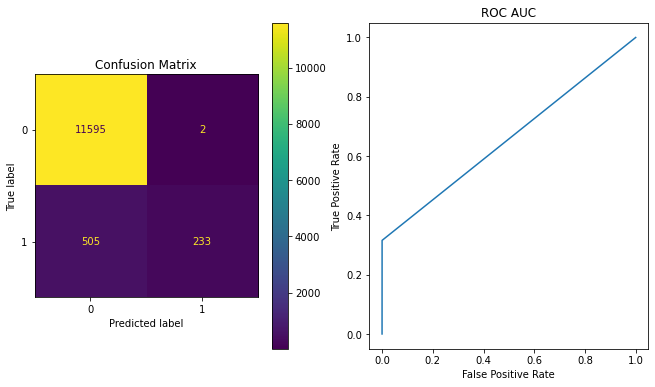

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     11597
           1       0.99      0.32      0.48       738

    accuracy                           0.96     12335
   macro avg       0.97      0.66      0.73     12335
weighted avg       0.96      0.96      0.95     12335



In [45]:
analysis_model_with_train('poly_kernel_svm_clf', poly_kernel_svm_clf, x_train, y_train)

Accuracy Score: 0.9309338521400778
F1 Score: 0.11618257261410789
Recall Score: 0.07567567567567568
Precision Score: 0.25
ROC AUC: 0.5305939606388038


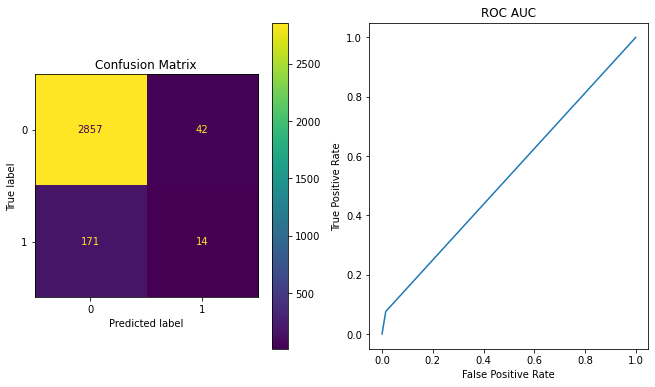

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2899
           1       0.25      0.08      0.12       185

    accuracy                           0.93      3084
   macro avg       0.60      0.53      0.54      3084
weighted avg       0.90      0.93      0.91      3084



In [46]:
analysis_model_with_test('poly_kernel_svm_clf', poly_kernel_svm_clf, x_test, y_test)

In [47]:
# RBF Kernel
rbf_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

In [48]:
rbf_kernel_svm_clf.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

Accuracy Score: 0.941305229023105
F1 Score: 0.03723404255319149
Recall Score: 0.018970189701897018
Precision Score: 1.0
ROC AUC: 0.5094850948509485


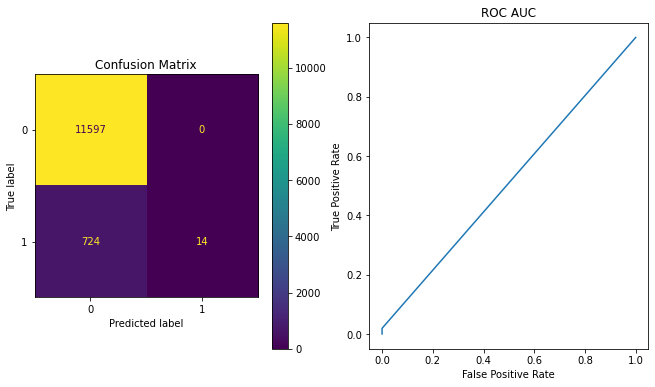

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11597
           1       1.00      0.02      0.04       738

    accuracy                           0.94     12335
   macro avg       0.97      0.51      0.50     12335
weighted avg       0.94      0.94      0.91     12335



In [49]:
analysis_model_with_train('rbf_kernel_svm_clf', rbf_kernel_svm_clf, x_train, y_train)

Accuracy Score: 0.9400129701686122
F1 Score: 0.0
Recall Score: 0.0
Precision Score: 0.0
ROC AUC: 0.5


/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


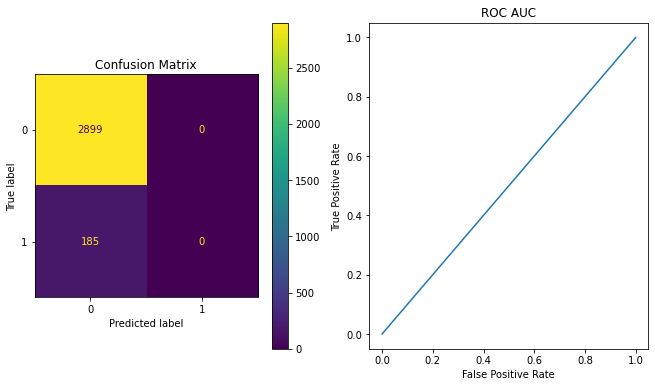

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.00      0.00      0.00       185

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084



/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
analysis_model_with_test('rbf_kernel_svm_clf', rbf_kernel_svm_clf, x_test, y_test)

### Training Model with Under Sampling

In [51]:
from imblearn.under_sampling import RandomUnderSampler

In [52]:
under_sampler = RandomUnderSampler(random_state=42, sampling_strategy=0.5)
X_under, y_under = under_sampler.fit_resample(X, y)
x_train, x_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=40, stratify=y_under)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2215, 31) (554, 31) (2215,) (554,)


In [53]:
y_train.value_counts()

0    1477
1     738
Name: FraudFound_P, dtype: int64

In [54]:
y_test.value_counts()

0    369
1    185
Name: FraudFound_P, dtype: int64

#### Logistic Regression

In [55]:
logistic_model = make_pipeline(StandardScaler(), LogisticRegression())

In [56]:
logistic_model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

Accuracy Score: 0.7345372460496614
F1 Score: 0.5944827586206897
Recall Score: 0.5840108401084011
Precision Score: 0.6053370786516854
ROC AUC: 0.6968801661611742


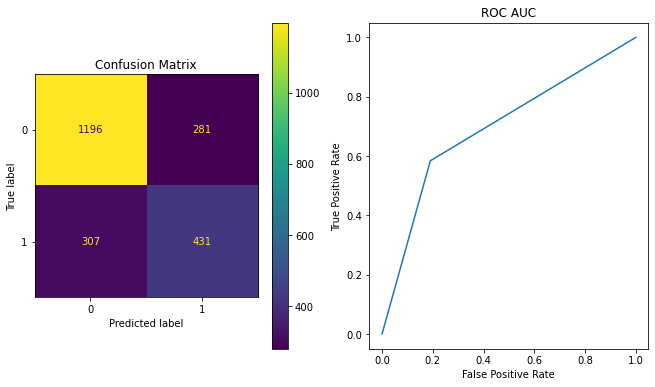

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1477
           1       0.61      0.58      0.59       738

    accuracy                           0.73      2215
   macro avg       0.70      0.70      0.70      2215
weighted avg       0.73      0.73      0.73      2215



In [57]:
analysis_model_with_train('logistic_model_under', logistic_model, x_train, y_train)

Accuracy Score: 0.6805054151624549
F1 Score: 0.5305039787798409
Recall Score: 0.5405405405405406
Precision Score: 0.5208333333333334
ROC AUC: 0.6456090236578041


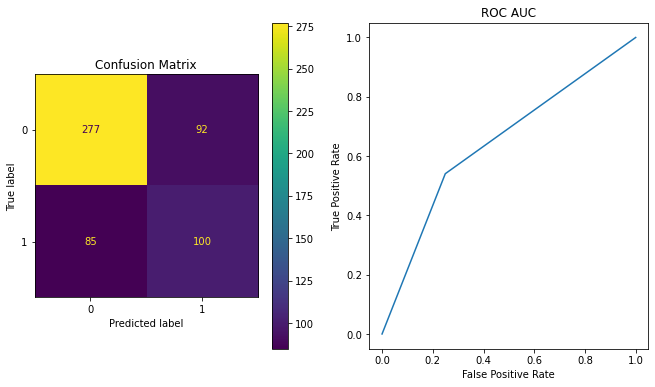

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       369
           1       0.52      0.54      0.53       185

    accuracy                           0.68       554
   macro avg       0.64      0.65      0.64       554
weighted avg       0.68      0.68      0.68       554



In [58]:
analysis_model_with_test('logistic_model_under', logistic_model, x_test, y_test)

### SVM Classifiers

#### LinearSVC

In [59]:
linearSVC_model = make_pipeline(StandardScaler(), LinearSVC(dual=False))

In [60]:
linearSVC_model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(dual=False))])

Accuracy Score: 0.7390519187358916
F1 Score: 0.6084010840108401
Recall Score: 0.6084010840108401
Precision Score: 0.6084010840108401
ROC AUC: 0.7063670958307418


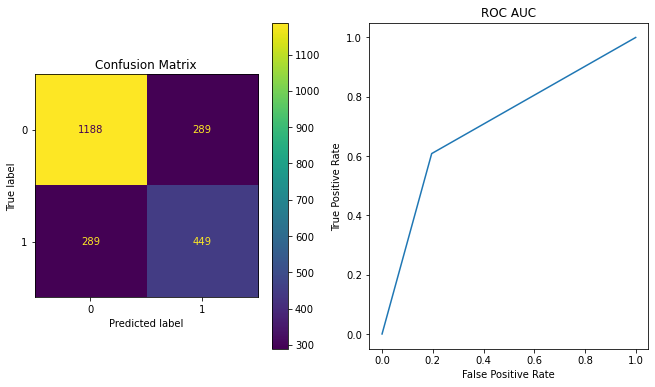

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1477
           1       0.61      0.61      0.61       738

    accuracy                           0.74      2215
   macro avg       0.71      0.71      0.71      2215
weighted avg       0.74      0.74      0.74      2215



In [61]:
analysis_model_with_train('linearSVC_model_under', linearSVC_model, x_train, y_train)

Accuracy Score: 0.6877256317689531
F1 Score: 0.5483028720626631
Recall Score: 0.5675675675675675
Precision Score: 0.5303030303030303
ROC AUC: 0.6577675236211822


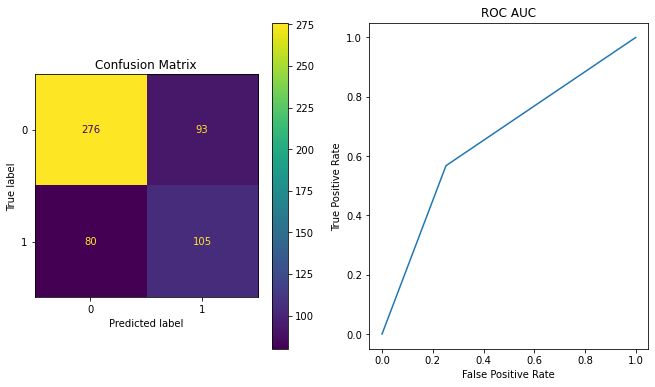

              precision    recall  f1-score   support

           0       0.78      0.75      0.76       369
           1       0.53      0.57      0.55       185

    accuracy                           0.69       554
   macro avg       0.65      0.66      0.65       554
weighted avg       0.69      0.69      0.69       554



In [62]:
analysis_model_with_test('linearSVC_model_under', linearSVC_model, x_test, y_test)

#### SVC

In [63]:
# Polynomial kernel
poly_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='poly', degree=3, C=5))

In [64]:
poly_kernel_svm_clf.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, kernel='poly'))])

Accuracy Score: 0.9173814898419864
F1 Score: 0.8680605623648161
Recall Score: 0.8157181571815718
Precision Score: 0.9275808936825886
ROC AUC: 0.8919484489360804


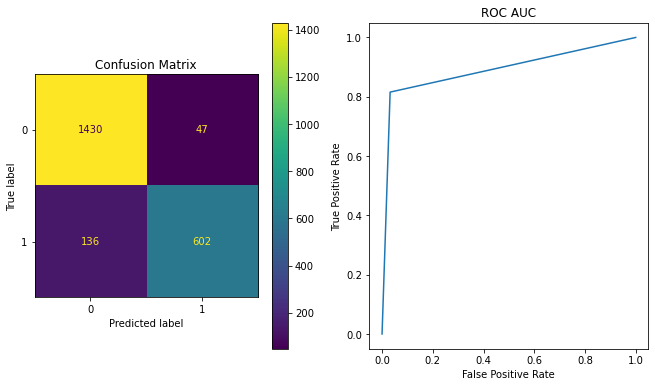

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1477
           1       0.93      0.82      0.87       738

    accuracy                           0.92      2215
   macro avg       0.92      0.89      0.90      2215
weighted avg       0.92      0.92      0.92      2215



In [65]:
analysis_model_with_train('poly_kernel_svm_clf_under', poly_kernel_svm_clf, x_train, y_train)

Accuracy Score: 0.6985559566787004
F1 Score: 0.5159420289855072
Recall Score: 0.4810810810810811
Precision Score: 0.55625
ROC AUC: 0.6443345784809199


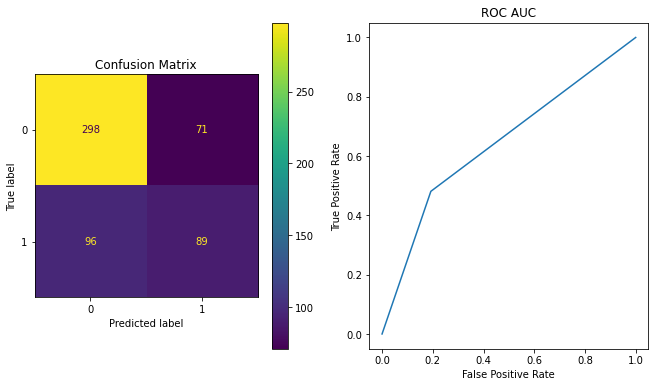

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       369
           1       0.56      0.48      0.52       185

    accuracy                           0.70       554
   macro avg       0.66      0.64      0.65       554
weighted avg       0.69      0.70      0.69       554



In [66]:
analysis_model_with_test('poly_kernel_svm_clf_under', poly_kernel_svm_clf, x_test, y_test)

In [67]:
# RBF Kernel
rbf_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='auto'))

In [68]:
rbf_kernel_svm_clf.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

Accuracy Score: 0.8221218961625282
F1 Score: 0.7173601147776184
Recall Score: 0.6775067750677507
Precision Score: 0.7621951219512195
ROC AUC: 0.7859436380416613


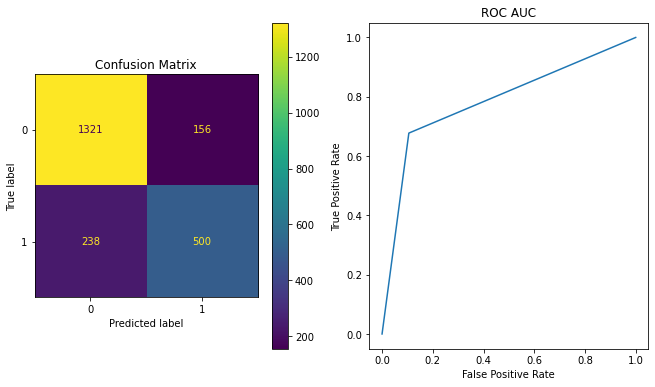

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1477
           1       0.76      0.68      0.72       738

    accuracy                           0.82      2215
   macro avg       0.80      0.79      0.79      2215
weighted avg       0.82      0.82      0.82      2215



In [69]:
analysis_model_with_train('rbf_kernel_svm_clf_under', rbf_kernel_svm_clf, x_train, y_train)

Accuracy Score: 0.7256317689530686
F1 Score: 0.5632183908045978
Recall Score: 0.5297297297297298
Precision Score: 0.6012269938650306
ROC AUC: 0.6767889841060573


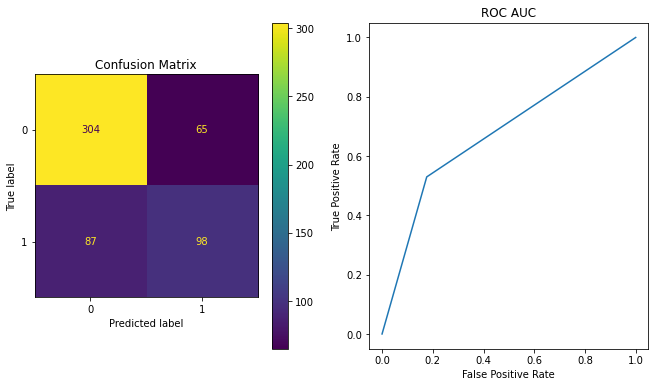

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       369
           1       0.60      0.53      0.56       185

    accuracy                           0.73       554
   macro avg       0.69      0.68      0.68       554
weighted avg       0.72      0.73      0.72       554



In [70]:
analysis_model_with_test('rbf_kernel_svm_clf_under', rbf_kernel_svm_clf, x_test, y_test)

In [71]:
# Sigmoid Kernel
sigmoid_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='sigmoid', gamma='auto'))

In [72]:
sigmoid_kernel_svm_clf.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', kernel='sigmoid'))])

Accuracy Score: 0.6668171557562077
F1 Score: 0.46906474820143884
Recall Score: 0.44173441734417346
Precision Score: 0.5
ROC AUC: 0.6105083731947679


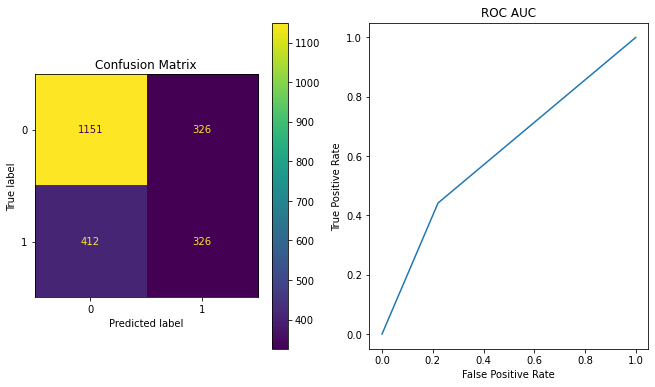

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      1477
           1       0.50      0.44      0.47       738

    accuracy                           0.67      2215
   macro avg       0.62      0.61      0.61      2215
weighted avg       0.66      0.67      0.66      2215



In [73]:
analysis_model_with_train('sigmoid_kernel_svm_clf_under', sigmoid_kernel_svm_clf, x_train, y_train)

Accuracy Score: 0.648014440433213
F1 Score: 0.4628099173553719
Recall Score: 0.4540540540540541
Precision Score: 0.47191011235955055
ROC AUC: 0.5996557533142899


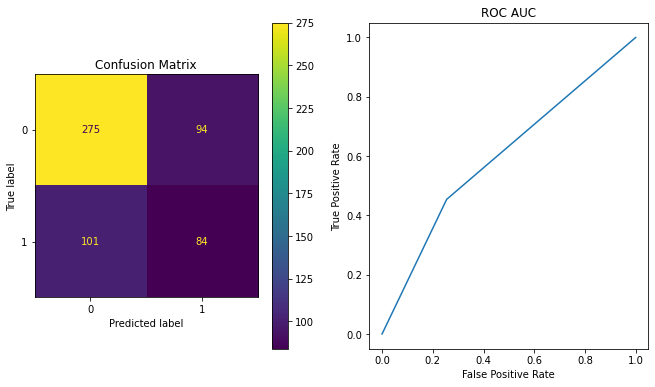

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       369
           1       0.47      0.45      0.46       185

    accuracy                           0.65       554
   macro avg       0.60      0.60      0.60       554
weighted avg       0.64      0.65      0.65       554



In [74]:
analysis_model_with_test('sigmoid_kernel_svm_clf_under', sigmoid_kernel_svm_clf, x_test, y_test)

#### Grid Search CV on SVM

In [79]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [78]:
svm_model = SVC()

In [79]:
grid_parameters = {'C': [0.1, 1, 10, 100], 
                   'gamma': [1, 0.1, 0.01, 0.001],
                   'kernel': ['poly', 'rbf', 'sigmoid', 'linear']}

grid_search = GridSearchCV(estimator=svm_model, param_grid=grid_parameters, scoring='f1', cv=3)

#### Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_clf = DecisionTreeClassifier(max_depth=2)

In [76]:
decision_tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

Accuracy Score: 0.6970654627539503
F1 Score: 0.6725231820400195
Recall Score: 0.9336043360433605
Precision Score: 0.5255530129672006
ROC AUC: 0.7562402181232374


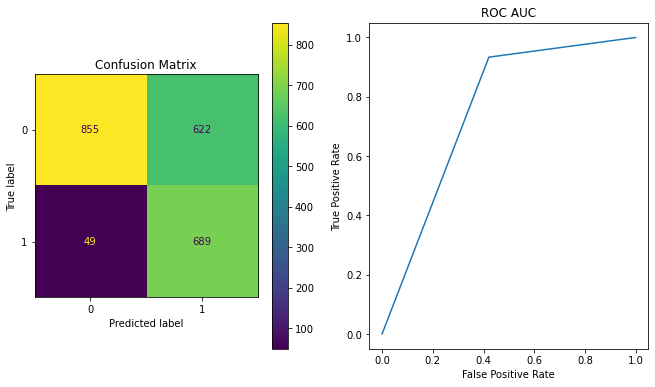

              precision    recall  f1-score   support

           0       0.95      0.58      0.72      1477
           1       0.53      0.93      0.67       738

    accuracy                           0.70      2215
   macro avg       0.74      0.76      0.70      2215
weighted avg       0.81      0.70      0.70      2215



In [77]:
analysis_model_with_train('decision_tree_clf_under', decision_tree_clf, x_train, y_train)

Accuracy Score: 0.6606498194945848
F1 Score: 0.6342412451361867
Recall Score: 0.8810810810810811
Precision Score: 0.49544072948328266
ROC AUC: 0.7156082912180473


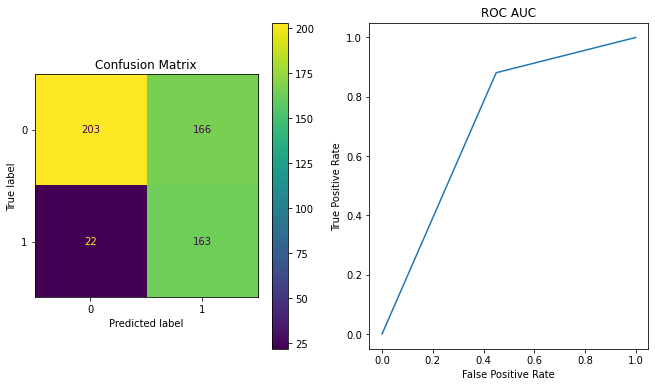

              precision    recall  f1-score   support

           0       0.90      0.55      0.68       369
           1       0.50      0.88      0.63       185

    accuracy                           0.66       554
   macro avg       0.70      0.72      0.66       554
weighted avg       0.77      0.66      0.67       554



In [78]:
analysis_model_with_test('decision_tree_clf_under', decision_tree_clf, x_test, y_test)

#### Grid Search CV on Decisoin Tree

In [80]:
dt_model = DecisionTreeClassifier()

In [86]:
grid_parameters = {'criterion':['gini','entropy'], 'max_depth': np.arange(2, 21)}
grid_search = GridSearchCV(estimator=dt_model, param_grid=grid_parameters, cv=5, scoring='f1')

In [87]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])},
             scoring='f1')

In [89]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [91]:
grid_search.best_score_

0.6719061137342404

Accuracy Score: 0.6970654627539503
F1 Score: 0.6725231820400195
Recall Score: 0.9336043360433605
Precision Score: 0.5255530129672006
ROC AUC: 0.7562402181232374


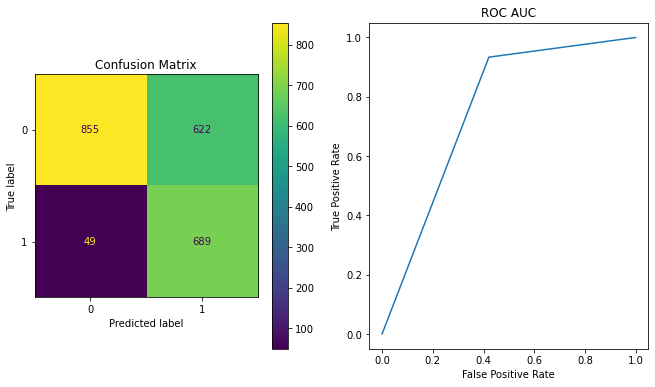

              precision    recall  f1-score   support

           0       0.95      0.58      0.72      1477
           1       0.53      0.93      0.67       738

    accuracy                           0.70      2215
   macro avg       0.74      0.76      0.70      2215
weighted avg       0.81      0.70      0.70      2215



In [92]:
analysis_model_with_train('decision_tree_clf_under', grid_search.best_estimator_, x_train, y_train)

Accuracy Score: 0.6606498194945848
F1 Score: 0.6342412451361867
Recall Score: 0.8810810810810811
Precision Score: 0.49544072948328266
ROC AUC: 0.7156082912180473


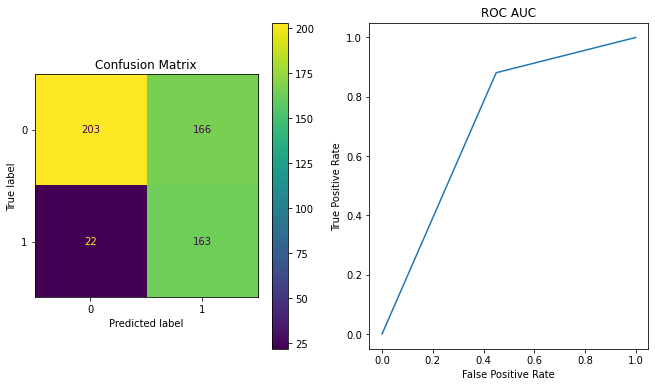

              precision    recall  f1-score   support

           0       0.90      0.55      0.68       369
           1       0.50      0.88      0.63       185

    accuracy                           0.66       554
   macro avg       0.70      0.72      0.66       554
weighted avg       0.77      0.66      0.67       554



In [93]:
analysis_model_with_test('decision_tree_clf_under', grid_search.best_estimator_, x_test, y_test)

#### Random Forest

In [155]:
from sklearn.ensemble import RandomForestClassifier
random_forest_clf = RandomForestClassifier()

In [156]:
random_forest_clf.fit(x_train, y_train)

RandomForestClassifier()

Accuracy Score: 1.0
F1 Score: 1.0
Recall Score: 1.0
Precision Score: 1.0
ROC AUC: 1.0


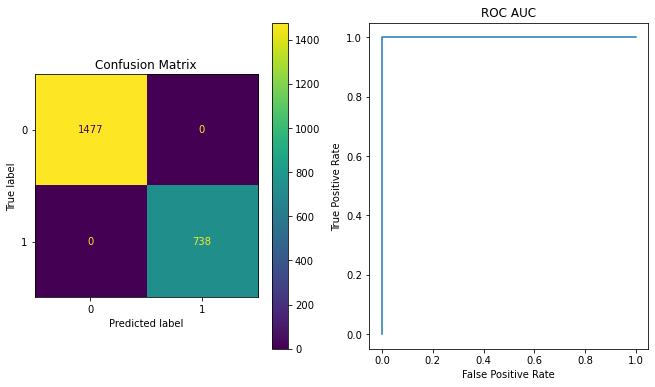

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1477
           1       1.00      1.00      1.00       738

    accuracy                           1.00      2215
   macro avg       1.00      1.00      1.00      2215
weighted avg       1.00      1.00      1.00      2215



In [157]:
analysis_model_with_train('random_forest_clf_under', random_forest_clf, x_train, y_train)

Accuracy Score: 0.720216606498195
F1 Score: 0.5753424657534246
Recall Score: 0.5675675675675675
Precision Score: 0.5833333333333334
ROC AUC: 0.6821577675236211


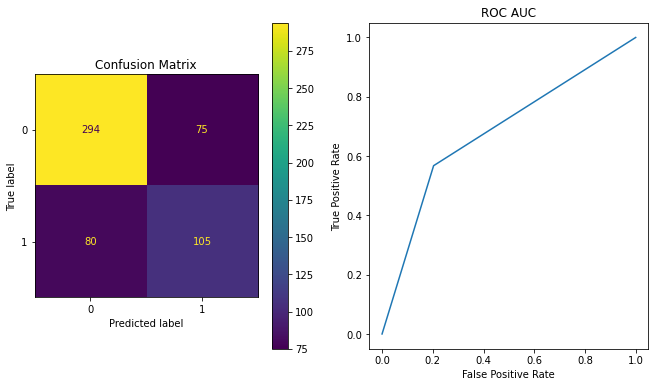

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       369
           1       0.58      0.57      0.58       185

    accuracy                           0.72       554
   macro avg       0.68      0.68      0.68       554
weighted avg       0.72      0.72      0.72       554



In [158]:
analysis_model_with_test('random_forest_clf_under', random_forest_clf, x_test, y_test)

#### Grid Search CV on Random Forest

In [168]:
grid_parameters = {'criterion':['gini', 'entropy'], 
                   'max_features': ['sqrt', 'log2'],  
                   'max_depth': np.arange(2, 21)}
grid_search = GridSearchCV(estimator=random_forest_clf, param_grid=grid_parameters, cv=5, error_score='raise')

In [169]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20]),
                         'max_features': ['sqrt', 'log2']})

In [170]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt'}

Accuracy Score: 0.9674943566591422
F1 Score: 0.9498607242339833
Recall Score: 0.924119241192412
Precision Score: 0.9770773638968482
ROC AUC: 0.956643236032902


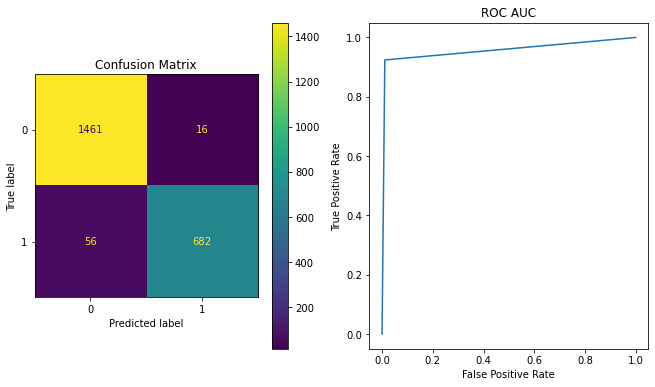

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1477
           1       0.98      0.92      0.95       738

    accuracy                           0.97      2215
   macro avg       0.97      0.96      0.96      2215
weighted avg       0.97      0.97      0.97      2215



In [171]:
analysis_model_with_train('random_forest_clf_under', grid_search.best_estimator_, x_train, y_train)

Accuracy Score: 0.7364620938628159
F1 Score: 0.598901098901099
Recall Score: 0.5891891891891892
Precision Score: 0.6089385474860335
ROC AUC: 0.6997436460851095


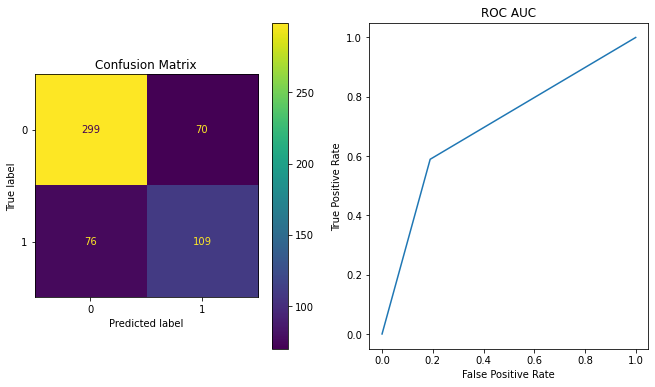

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       369
           1       0.61      0.59      0.60       185

    accuracy                           0.74       554
   macro avg       0.70      0.70      0.70       554
weighted avg       0.73      0.74      0.74       554



In [172]:
analysis_model_with_test('random_forest_clf_under', grid_search.best_estimator_, x_test, y_test)

#### Extra Trees

In [174]:
from sklearn.ensemble import ExtraTreesClassifier
extra_trees_clf = ExtraTreesClassifier()

In [175]:
extra_trees_clf.fit(x_train, y_train)

ExtraTreesClassifier()

Accuracy Score: 1.0
F1 Score: 1.0
Recall Score: 1.0
Precision Score: 1.0
ROC AUC: 1.0


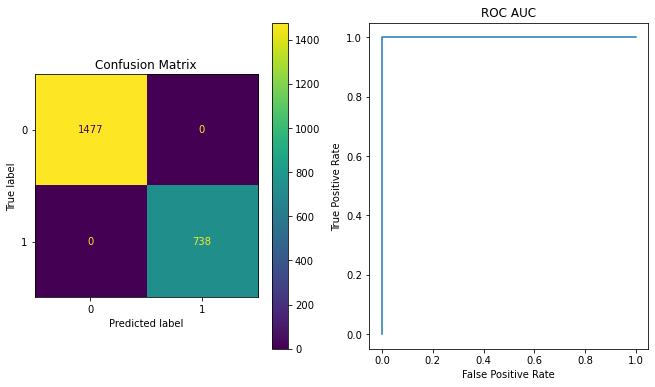

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1477
           1       1.00      1.00      1.00       738

    accuracy                           1.00      2215
   macro avg       1.00      1.00      1.00      2215
weighted avg       1.00      1.00      1.00      2215



In [177]:
analysis_model_with_train('extra_trees_clf_under', extra_trees_clf, x_train, y_train)

Accuracy Score: 0.7129963898916968
F1 Score: 0.5595567867036011
Recall Score: 0.5459459459459459
Precision Score: 0.5738636363636364
ROC AUC: 0.6713469567128104


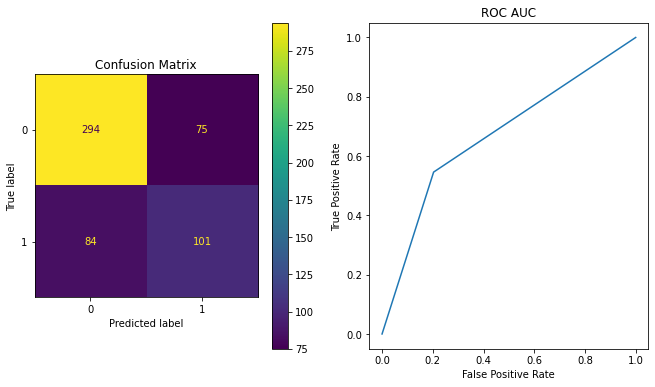

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       369
           1       0.57      0.55      0.56       185

    accuracy                           0.71       554
   macro avg       0.68      0.67      0.67       554
weighted avg       0.71      0.71      0.71       554



In [178]:
analysis_model_with_test('extra_trees_clf_under', extra_trees_clf, x_test, y_test)

#### Grid Search CV on Extra Tree

In [179]:
grid_parameters = {'criterion':['gini', 'entropy'], 
                   'max_features': ['sqrt', 'log2'],  
                   'max_depth': np.arange(2, 21)}
grid_search = GridSearchCV(estimator=extra_trees_clf, param_grid=grid_parameters, cv=5, error_score='raise')

In [180]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20]),
                         'max_features': ['sqrt', 'log2']})

In [181]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 14, 'max_features': 'sqrt'}

Accuracy Score: 0.980135440180587
F1 Score: 0.9695712309820194
Recall Score: 0.9498644986449865
Precision Score: 0.9901129943502824
ROC AUC: 0.9725625810760476


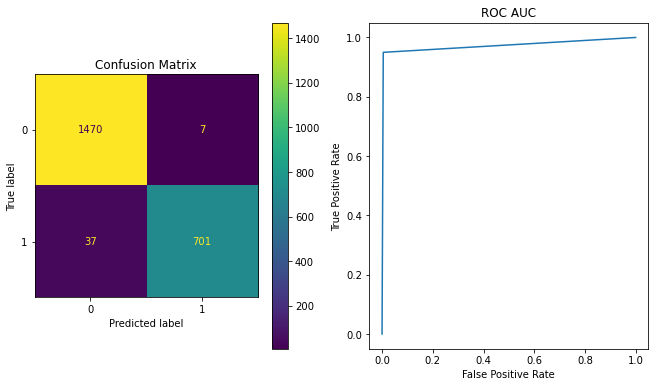

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1477
           1       0.99      0.95      0.97       738

    accuracy                           0.98      2215
   macro avg       0.98      0.97      0.98      2215
weighted avg       0.98      0.98      0.98      2215



In [182]:
analysis_model_with_train('extra_trees_clf_under', grid_search.best_estimator_, x_train, y_train)

Accuracy Score: 0.6949458483754513
F1 Score: 0.515759312320917
Recall Score: 0.4864864864864865
Precision Score: 0.5487804878048781
ROC AUC: 0.6429722405332162


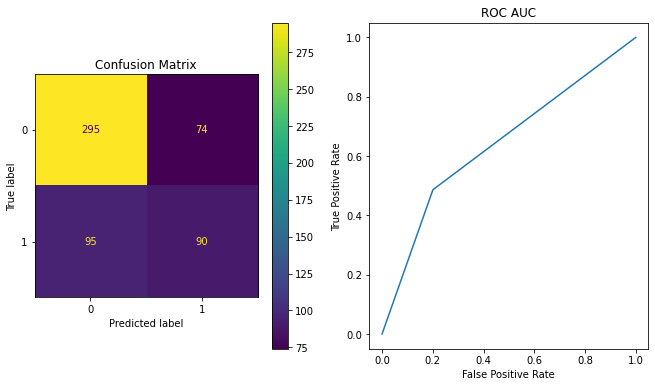

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       369
           1       0.55      0.49      0.52       185

    accuracy                           0.69       554
   macro avg       0.65      0.64      0.65       554
weighted avg       0.69      0.69      0.69       554



In [183]:
analysis_model_with_test('extra_trees_clf_under', grid_search.best_estimator_, x_test, y_test)

#### KNN

In [184]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [186]:
knn_clf.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

Accuracy Score: 0.8081264108352144
F1 Score: 0.7046560111188325
Recall Score: 0.6869918699186992
Precision Score: 0.7232524964336662
ROC AUC: 0.7778222721292887


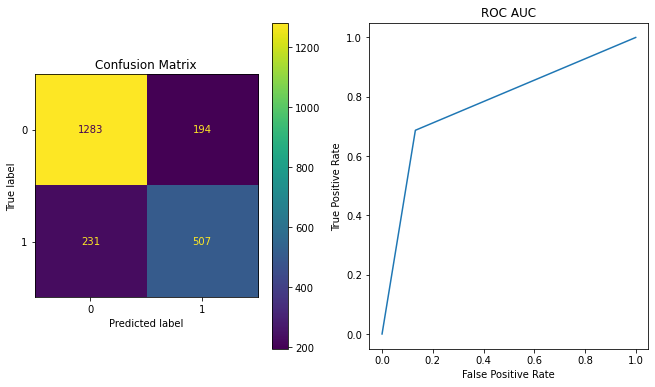

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1477
           1       0.72      0.69      0.70       738

    accuracy                           0.81      2215
   macro avg       0.79      0.78      0.78      2215
weighted avg       0.81      0.81      0.81      2215



In [188]:
analysis_model_with_train('knn_clf_under', knn_clf, x_train, y_train)

Accuracy Score: 0.6985559566787004
F1 Score: 0.5242165242165242
Recall Score: 0.4972972972972973
Precision Score: 0.5542168674698795
ROC AUC: 0.6483776459386216


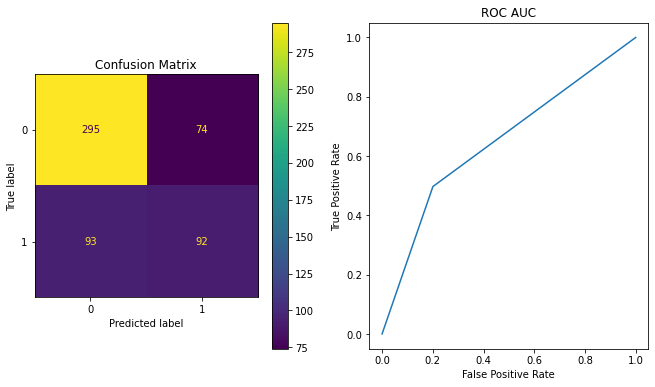

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       369
           1       0.55      0.50      0.52       185

    accuracy                           0.70       554
   macro avg       0.66      0.65      0.65       554
weighted avg       0.69      0.70      0.69       554



In [189]:
analysis_model_with_test('knn_clf_under', knn_clf, x_test, y_test)

#### Grid Search CV on KNN

In [206]:
grid_parameters = {'n_neighbors': np.arange(5, 31),
                   'weights': ['uniform', 'distance']}

grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=grid_parameters, cv=10, scoring='f1')

In [210]:
standard_scaler = StandardScaler()
x_train_scaled = standard_scaler.fit_transform(x_train)

In [211]:
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30]),
                         'weights': ['uniform', 'distance']},
             scoring='f1')

### Naive Bayes

In [216]:
# Gaussian NB
from sklearn.naive_bayes import GaussianNB
gaussian_nb_clf = make_pipeline(StandardScaler(),  GaussianNB())

In [218]:
gaussian_nb_clf.fit(x_train, y_train)   

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

Accuracy Score: 0.7079006772009029
F1 Score: 0.6474114441416894
Recall Score: 0.8048780487804879
Precision Score: 0.5414767547857794
ROC AUC: 0.7321614346813746


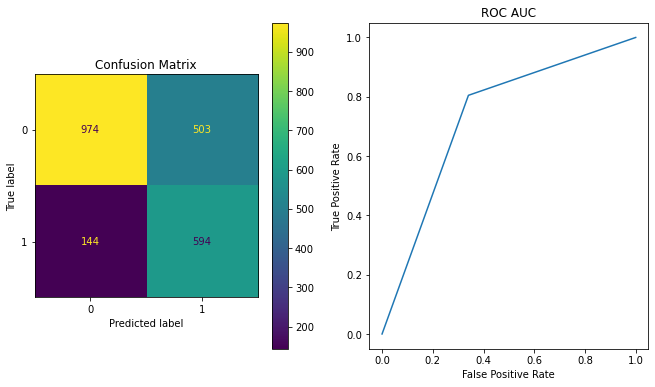

              precision    recall  f1-score   support

           0       0.87      0.66      0.75      1477
           1       0.54      0.80      0.65       738

    accuracy                           0.71      2215
   macro avg       0.71      0.73      0.70      2215
weighted avg       0.76      0.71      0.72      2215



In [220]:
analysis_model_with_train('gaussian_nb_clf_under', gaussian_nb_clf, x_train, y_train)

Accuracy Score: 0.648014440433213
F1 Score: 0.5788336933045356
Recall Score: 0.7243243243243244
Precision Score: 0.48201438848920863
ROC AUC: 0.66704021094265


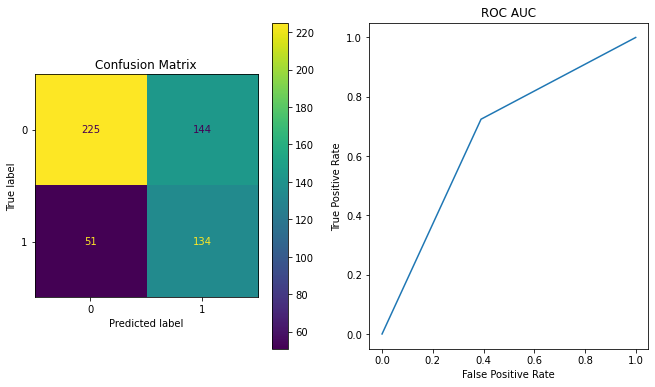

              precision    recall  f1-score   support

           0       0.82      0.61      0.70       369
           1       0.48      0.72      0.58       185

    accuracy                           0.65       554
   macro avg       0.65      0.67      0.64       554
weighted avg       0.70      0.65      0.66       554



In [221]:
analysis_model_with_test('gaussian_nb_clf_under', gaussian_nb_clf, x_test, y_test)

In [222]:
# Bernoulli NB
from sklearn.naive_bayes import BernoulliNB
ber_nb_clf = make_pipeline(StandardScaler(), BernoulliNB())

In [223]:
ber_nb_clf.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('bernoullinb', BernoulliNB())])

Accuracy Score: 0.725507900677201
F1 Score: 0.5886332882273343
Recall Score: 0.5894308943089431
Precision Score: 0.5878378378378378
ROC AUC: 0.6914656164164892


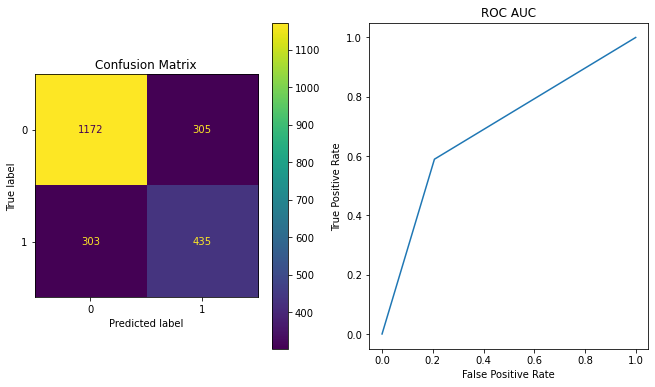

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1477
           1       0.59      0.59      0.59       738

    accuracy                           0.73      2215
   macro avg       0.69      0.69      0.69      2215
weighted avg       0.73      0.73      0.73      2215



In [225]:
analysis_model_with_train('ber_nb_clf_under', ber_nb_clf, x_train, y_train)

Accuracy Score: 0.6967509025270758
F1 Score: 0.5757575757575759
Recall Score: 0.6162162162162163
Precision Score: 0.5402843601895735
ROC AUC: 0.6766717937449644


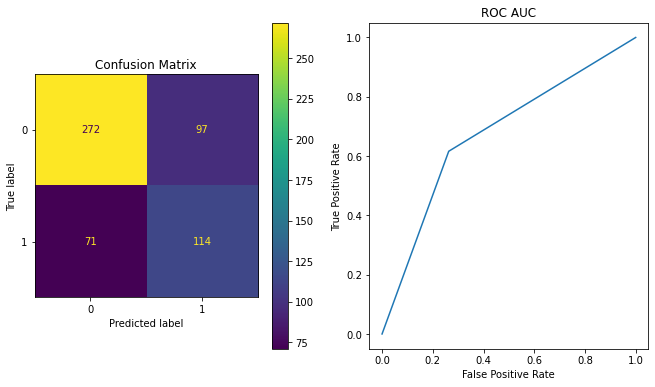

              precision    recall  f1-score   support

           0       0.79      0.74      0.76       369
           1       0.54      0.62      0.58       185

    accuracy                           0.70       554
   macro avg       0.67      0.68      0.67       554
weighted avg       0.71      0.70      0.70       554



In [226]:
analysis_model_with_test('ber_nb_clf_under', ber_nb_clf, x_test, y_test)

#### AdaBoost

In [242]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=300, learning_rate=2)

In [243]:
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=2, n_estimators=300)

Accuracy Score: 0.6966139954853273
F1 Score: 0.671875
Recall Score: 0.9322493224932249
Precision Score: 0.5251908396946565
ROC AUC: 0.7555627113481697


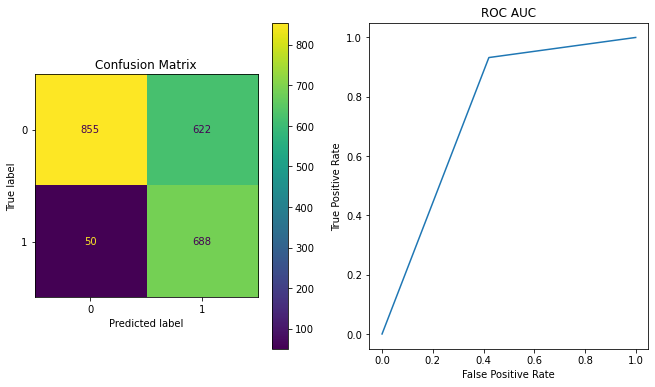

              precision    recall  f1-score   support

           0       0.94      0.58      0.72      1477
           1       0.53      0.93      0.67       738

    accuracy                           0.70      2215
   macro avg       0.73      0.76      0.69      2215
weighted avg       0.80      0.70      0.70      2215



In [244]:
analysis_model_with_train('ada_clf_under', ada_clf, x_train, y_train)

Accuracy Score: 0.6606498194945848
F1 Score: 0.6342412451361867
Recall Score: 0.8810810810810811
Precision Score: 0.49544072948328266
ROC AUC: 0.7156082912180473


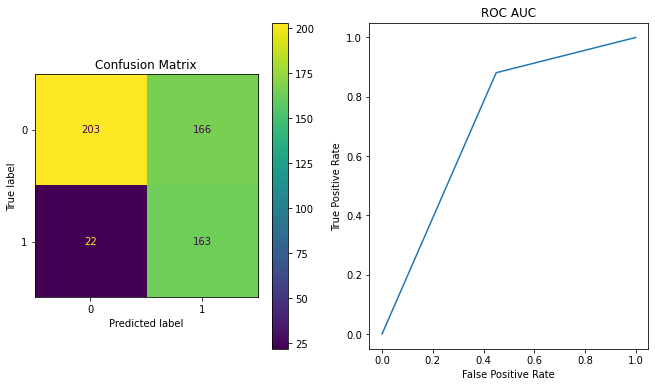

              precision    recall  f1-score   support

           0       0.90      0.55      0.68       369
           1       0.50      0.88      0.63       185

    accuracy                           0.66       554
   macro avg       0.70      0.72      0.66       554
weighted avg       0.77      0.66      0.67       554



In [245]:
analysis_model_with_test('ada_clf_under', ada_clf, x_test, y_test)

#### Grid Search CV on AdaBoost

In [261]:
grid_parameters = {'n_estimators':[300, 500, 700, 1000],
                   'learning_rate':[0.5, 1, 1.5, 2, 2.5]}

grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid_parameters, cv=5, scoring='roc_auc') 

In [262]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.5, 1, 1.5, 2, 2.5],
                         'n_estimators': [300, 500, 700, 1000]},
             scoring='roc_auc')

In [263]:
grid_search.best_params_

{'learning_rate': 0.5, 'n_estimators': 300}

Accuracy Score: 0.7634311512415349
F1 Score: 0.6345885634588564
Recall Score: 0.6165311653116531
Precision Score: 0.6537356321839081
ROC AUC: 0.7266812901710601


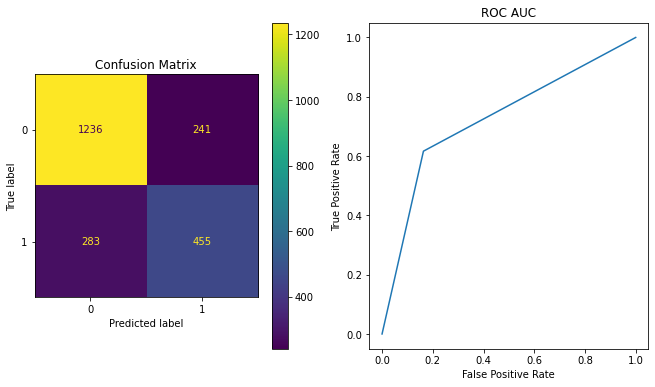

              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1477
           1       0.65      0.62      0.63       738

    accuracy                           0.76      2215
   macro avg       0.73      0.73      0.73      2215
weighted avg       0.76      0.76      0.76      2215



In [264]:
analysis_model_with_train('ada_clf_under', grid_search.best_estimator_, x_train, y_train)

Accuracy Score: 0.6877256317689531
F1 Score: 0.5336927223719676
Recall Score: 0.5351351351351351
Precision Score: 0.532258064516129
ROC AUC: 0.6496813887057789


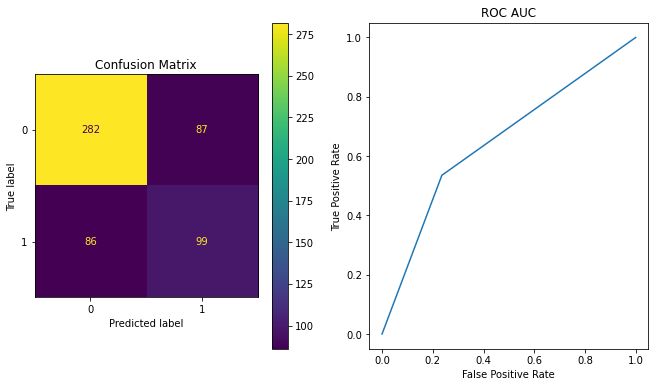

              precision    recall  f1-score   support

           0       0.77      0.76      0.77       369
           1       0.53      0.54      0.53       185

    accuracy                           0.69       554
   macro avg       0.65      0.65      0.65       554
weighted avg       0.69      0.69      0.69       554



In [265]:
analysis_model_with_test('ada_clf_under', grid_search.best_estimator_, x_test, y_test)

#### Gradient Boosting

In [266]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()

In [268]:
gb_clf.fit(x_train, y_train)

GradientBoostingClassifier()

Accuracy Score: 0.8261851015801355
F1 Score: 0.7282992237120677
Recall Score: 0.6991869918699187
Precision Score: 0.759941089837997
ROC AUC: 0.7944140781962999


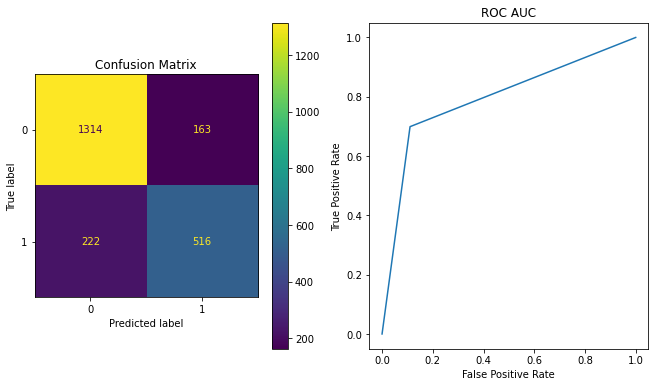

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1477
           1       0.76      0.70      0.73       738

    accuracy                           0.83      2215
   macro avg       0.81      0.79      0.80      2215
weighted avg       0.82      0.83      0.82      2215



In [269]:
analysis_model_with_train('gb_clf_under', gb_clf, x_train, y_train)

Accuracy Score: 0.7220216606498195
F1 Score: 0.5837837837837838
Recall Score: 0.5837837837837838
Precision Score: 0.5837837837837838
ROC AUC: 0.6875558485314582


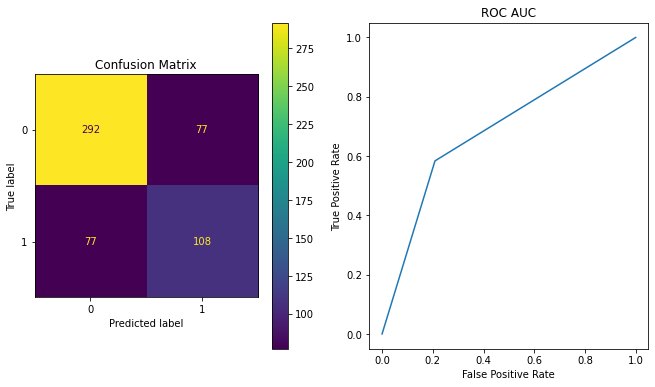

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       369
           1       0.58      0.58      0.58       185

    accuracy                           0.72       554
   macro avg       0.69      0.69      0.69       554
weighted avg       0.72      0.72      0.72       554



In [270]:
analysis_model_with_test('gb_clf_under', gb_clf, x_test, y_test)

#### XG Boost

In [271]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()

In [273]:
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Accuracy Score: 1.0
F1 Score: 1.0
Recall Score: 1.0
Precision Score: 1.0
ROC AUC: 1.0


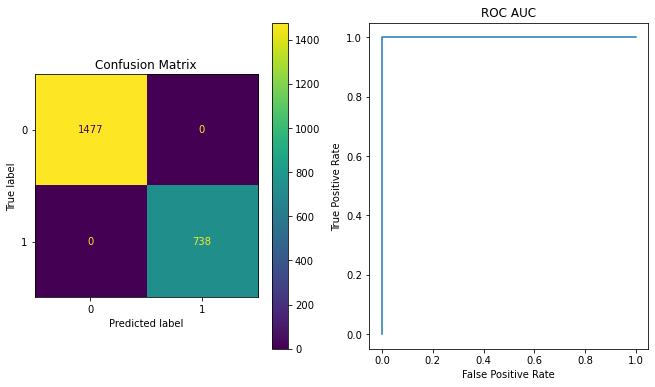

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1477
           1       1.00      1.00      1.00       738

    accuracy                           1.00      2215
   macro avg       1.00      1.00      1.00      2215
weighted avg       1.00      1.00      1.00      2215



In [274]:
analysis_model_with_train('xgb_clf_under', xgb_clf, x_train, y_train)

Accuracy Score: 0.7310469314079422
F1 Score: 0.6109660574412532
Recall Score: 0.6324324324324324
Precision Score: 0.5909090909090909
ROC AUC: 0.7064601186552406


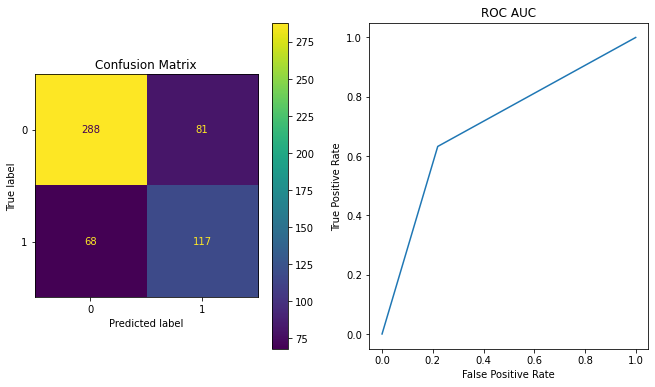

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       369
           1       0.59      0.63      0.61       185

    accuracy                           0.73       554
   macro avg       0.70      0.71      0.70       554
weighted avg       0.74      0.73      0.73       554



In [275]:
analysis_model_with_test('xgb_clf_under', xgb_clf, x_test, y_test)

### Training Model with Over Sampling

In [277]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42, sampling_strategy=0.5)
X_over, y_over = over_sampler.fit_resample(X, y)
x_train, x_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=40, stratify=y_over)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(17395, 31) (4349, 31) (17395,) (4349,)


#### Logistic Regression

In [278]:
logistic_model = make_pipeline(StandardScaler(), LogisticRegression())

In [281]:
logistic_model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

Accuracy Score: 0.723081345214142
F1 Score: 0.5782330794151125
Recall Score: 0.5695067264573991
Precision Score: 0.5872310154721678
ROC AUC: 0.6846843798709347


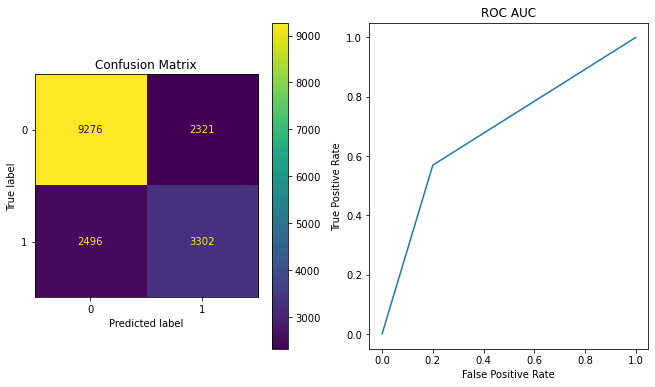

              precision    recall  f1-score   support

           0       0.79      0.80      0.79     11597
           1       0.59      0.57      0.58      5798

    accuracy                           0.72     17395
   macro avg       0.69      0.68      0.69     17395
weighted avg       0.72      0.72      0.72     17395



In [282]:
analysis_model_with_train('logistic_model_over', logistic_model, x_train, y_train)

Accuracy Score: 0.7199356173833065
F1 Score: 0.5770833333333334
Recall Score: 0.573103448275862
Precision Score: 0.5811188811188811
ROC AUC: 0.6832402374183725


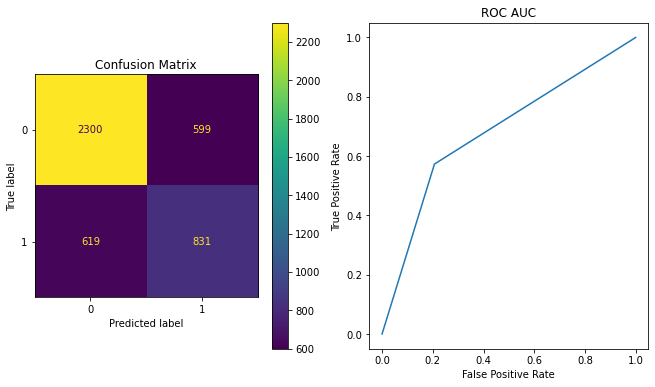

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      2899
           1       0.58      0.57      0.58      1450

    accuracy                           0.72      4349
   macro avg       0.68      0.68      0.68      4349
weighted avg       0.72      0.72      0.72      4349



In [283]:
analysis_model_with_test('logistic_model_over', logistic_model, x_test, y_test)

### SVM Classifiers

#### LinearSVC

In [284]:
linearSVC_model = make_pipeline(StandardScaler(), LinearSVC(dual=False))

In [285]:
linearSVC_model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(dual=False))])

Accuracy Score: 0.7246335153779822
F1 Score: 0.5865699982737788
Recall Score: 0.5860641600551915
Precision Score: 0.5870767104353836
ROC AUC: 0.6899881893662179


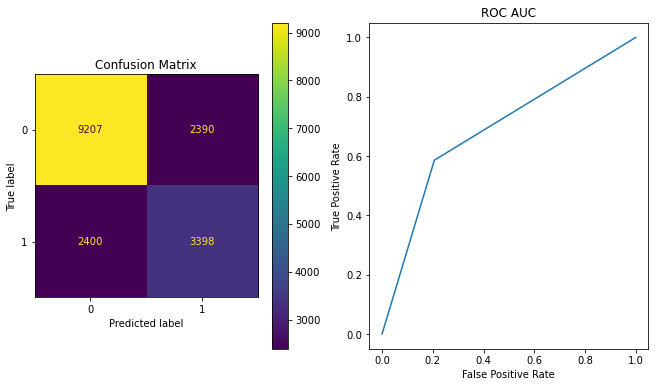

              precision    recall  f1-score   support

           0       0.79      0.79      0.79     11597
           1       0.59      0.59      0.59      5798

    accuracy                           0.72     17395
   macro avg       0.69      0.69      0.69     17395
weighted avg       0.72      0.72      0.72     17395



In [286]:
analysis_model_with_train('linearSVC_model_over', linearSVC_model, x_train, y_train)

Accuracy Score: 0.724534375718556
F1 Score: 0.5919618528610353
Recall Score: 0.5993103448275862
Precision Score: 0.5847913862718708
ROC AUC: 0.6932391668946485


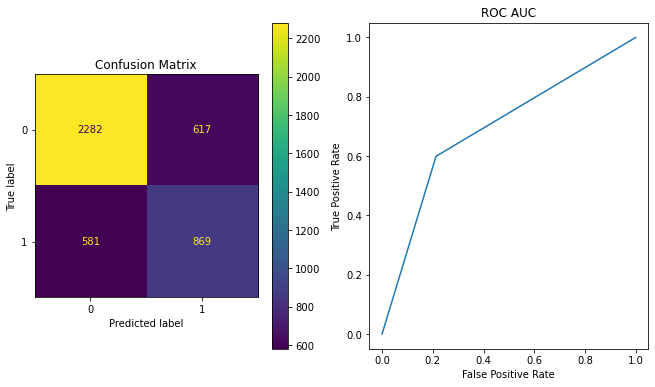

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      2899
           1       0.58      0.60      0.59      1450

    accuracy                           0.72      4349
   macro avg       0.69      0.69      0.69      4349
weighted avg       0.73      0.72      0.73      4349



In [287]:
analysis_model_with_test('linearSVC_model_over', linearSVC_model, x_test, y_test)

#### SVC

In [410]:
# Polynomial kernel
poly_kernel_svm_clf = SVC(kernel='poly', degree=3, )

In [411]:
params = {'coef0':[0.0,  0.2, 0.4, 0.6, 0.8, 1.0],
          'C':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 2.0, 3.0, 5.0]}
stf = StratifiedKFold()
grid_search = GridSearchCV(estimator=poly_kernel_svm_clf, param_grid=params, scoring='f1', cv=stf)

In [412]:
grid_search.fit(x_over, y_over)

KeyboardInterrupt: 

In [231]:
poly_kernel_svm_clf.fit(x_over, y_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

Accuracy Score: 0.9385455590686979
F1 Score: 0.9115578720939853
Recall Score: 0.9501552259399793
Precision Score: 0.8759739227222134
ROC AUC: 0.9414482260595819


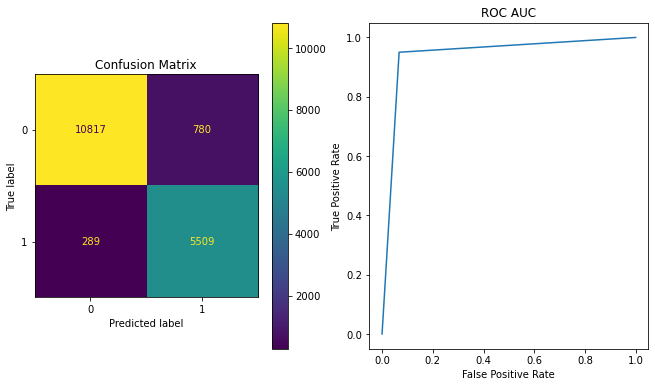

In [232]:
analysis_model_with_train('poly_kernel_svm_clf_over', poly_kernel_svm_clf, x_over, y_over)

Accuracy Score: 0.8612191958495461
F1 Score: 0.2161172161172161
Recall Score: 0.31891891891891894
Precision Score: 0.1634349030470914
ROC AUC: 0.6073725329330711


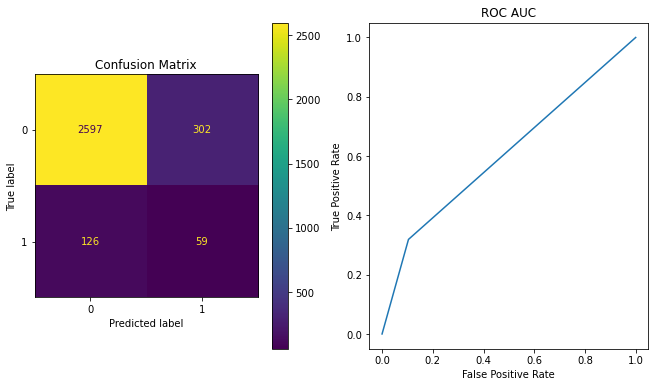

In [234]:
analysis_model_with_test('poly_kernel_svm_clf_over', poly_kernel_svm_clf, x_test, y_test)

In [238]:
# RBF Kernel
rbf_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

In [239]:
rbf_kernel_svm_clf.fit(x_over, y_over)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

Accuracy Score: 0.8942224777234837
F1 Score: 0.8461023753763801
Recall Score: 0.872369782683684
Precision Score: 0.8213705748619682
ROC AUC: 0.8887588328784464


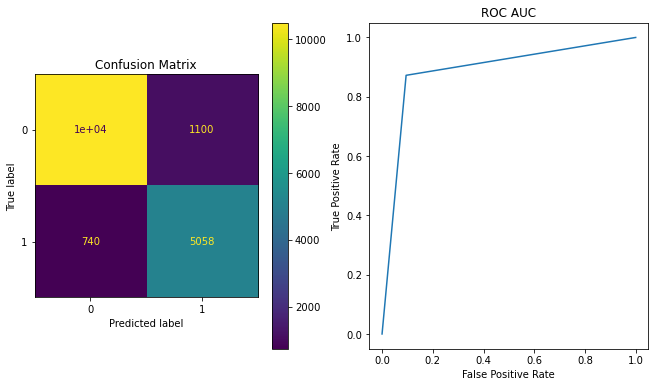

In [240]:
analysis_model_with_train('rbf_kernel_svm_clf_over', rbf_kernel_svm_clf, x_over, y_over)

Accuracy Score: 0.8576523994811932
F1 Score: 0.252129471890971
Recall Score: 0.4
Precision Score: 0.18407960199004975
ROC AUC: 0.643428768540876


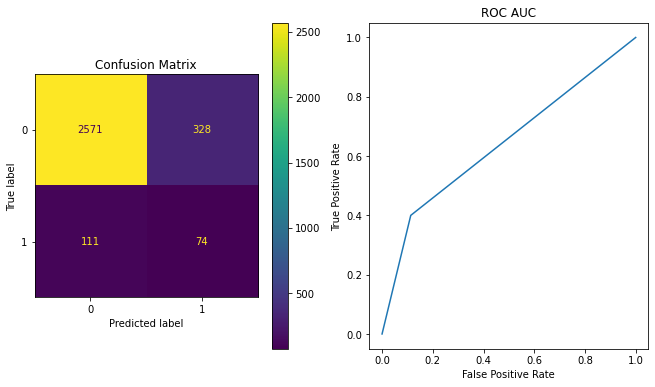

In [241]:
analysis_model_with_test('rbf_kernel_svm_clf_over', rbf_kernel_svm_clf, x_test, y_test)

In [242]:
# Sigmoid Kernel
sigmoid_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='sigmoid'))

In [243]:
sigmoid_kernel_svm_clf.fit(x_over, y_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='sigmoid'))])

Accuracy Score: 0.6403564242598447
F1 Score: 0.45180511742025936
Recall Score: 0.44463608140738187
Precision Score: 0.4592091200570004
ROC AUC: 0.5914221193447187


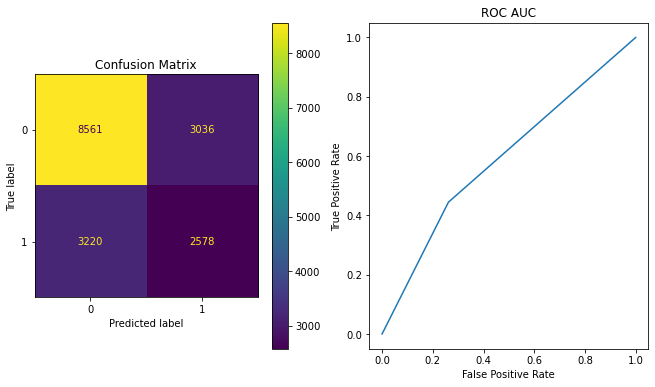

In [244]:
analysis_model_with_train('sigmoid_kernel_svm_clf_over', sigmoid_kernel_svm_clf, x_over, y_over)

Accuracy Score: 0.7311932555123216
F1 Score: 0.17839444995044598
Recall Score: 0.4864864864864865
Precision Score: 0.10922330097087378
ROC AUC: 0.6166478655267893


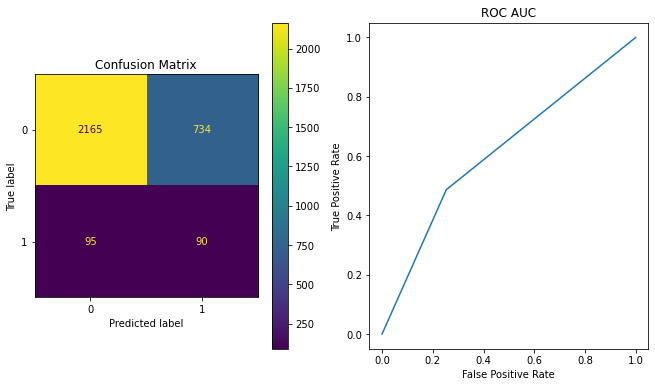

In [245]:
analysis_model_with_test('sigmoid_kernel_svm_clf_over', sigmoid_kernel_svm_clf, x_test, y_test)

#### Decision Tree

In [248]:
decision_tree_clf = DecisionTreeClassifier(max_depth=2)

In [249]:
decision_tree_clf.fit(x_over, y_over)

DecisionTreeClassifier(max_depth=2)

Accuracy Score: 0.6911181373958034
F1 Score: 0.6644182124789207
Recall Score: 0.9173853052776819
Precision Score: 0.5208068148438265
ROC AUC: 0.7476898070753332


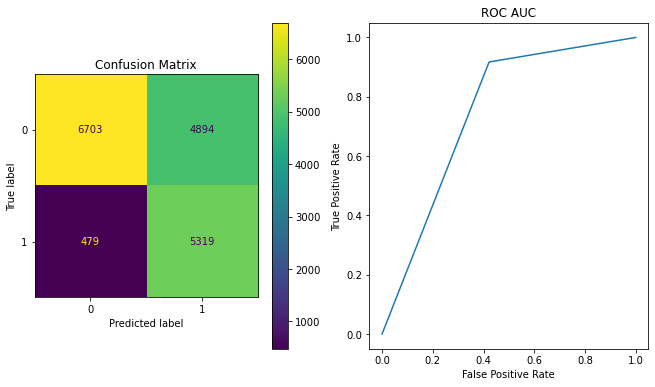

In [250]:
analysis_model_with_train('decision_tree_clf_over', decision_tree_clf, x_over, y_over)

Accuracy Score: 0.606355382619974
F1 Score: 0.2217948717948718
Recall Score: 0.9351351351351351
Precision Score: 0.12581818181818183
ROC AUC: 0.7602547010618761


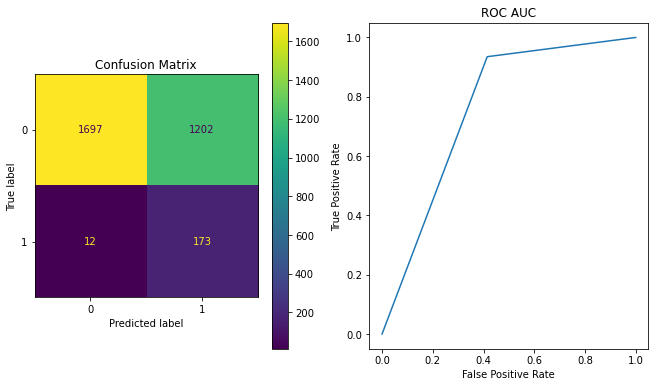

In [251]:
analysis_model_with_test('decision_tree_clf_over', decision_tree_clf, x_test, y_test)

#### Random Forest

In [293]:
random_forest_clf = RandomForestClassifier(max_depth=17)

In [294]:
random_forest_clf.fit(x_over, y_over) 

RandomForestClassifier(max_depth=17)

Accuracy Score: 0.9995400977292326
F1 Score: 0.9993105825577386
Recall Score: 1.0
Precision Score: 0.998622115053393
ROC AUC: 0.9996550832111752


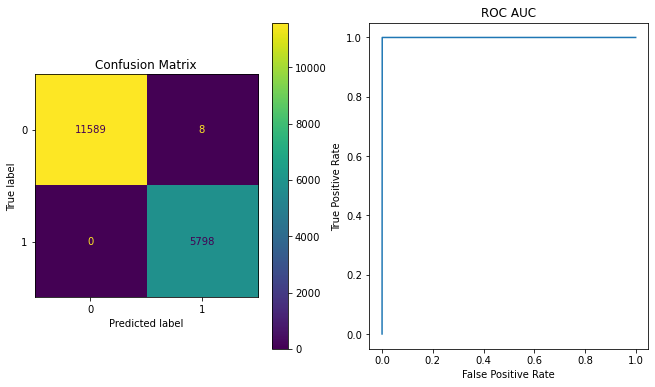

In [295]:
analysis_model_with_train('random_forest_clf_over', random_forest_clf, x_over, y_over)

Accuracy Score: 0.937094682230869
F1 Score: 0.11009174311926606
Recall Score: 0.06486486486486487
Precision Score: 0.36363636363636365
ROC AUC: 0.5288104938329153


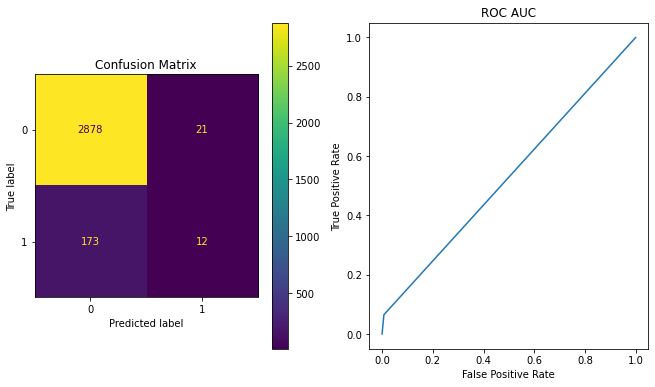

In [296]:
analysis_model_with_test('random_forest_clf_over', random_forest_clf, x_test, y_test)

#### Extra Trees

In [305]:
extra_trees_clf = ExtraTreesClassifier(max_depth=12)

In [306]:
extra_trees_clf.fit(x_over, y_over)

ExtraTreesClassifier(max_depth=12)

Accuracy Score: 0.9061799367634378
F1 Score: 0.8529994595568366
Recall Score: 0.8166609175577786
Precision Score: 0.8927224736048266
ROC AUC: 0.8837982521737329


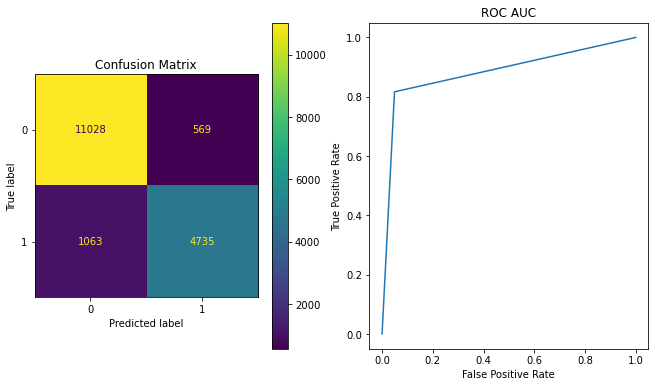

In [307]:
analysis_model_with_train('extra_trees_clf_over', extra_trees_clf, x_over, y_over)

Accuracy Score: 0.893644617380026
F1 Score: 0.2545454545454546
Recall Score: 0.3027027027027027
Precision Score: 0.2196078431372549
ROC AUC: 0.6170291712892609


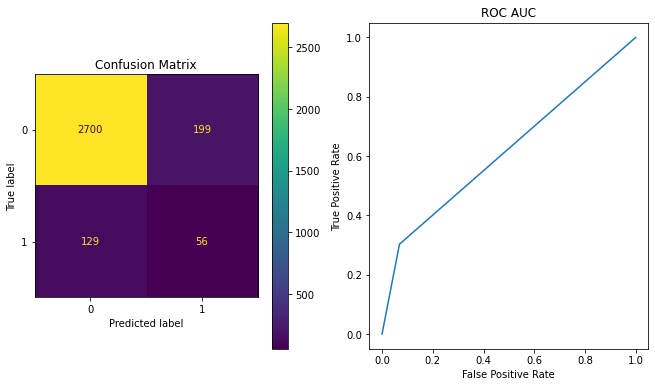

In [308]:
analysis_model_with_test('extra_trees_clf_over', extra_trees_clf, x_test, y_test)

#### KNN

In [309]:
knn_clf = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [310]:
knn_clf.fit(x_over, y_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

Accuracy Score: 0.933314170738718
F1 Score: 0.9089767733835529
Recall Score: 0.9989651604001379
Precision Score: 0.8338612150878203
ROC AUC: 0.9497283334121066


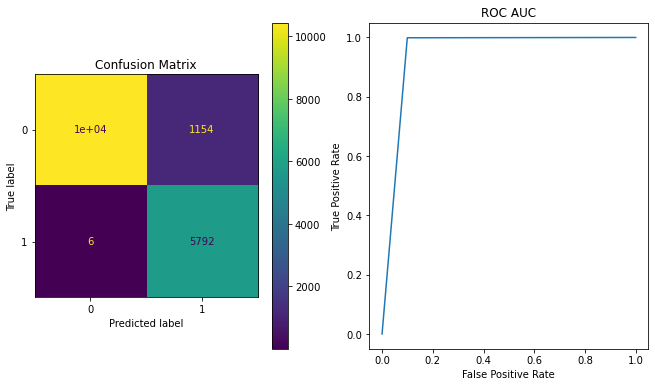

In [311]:
analysis_model_with_train('knn_clf_over', knn_clf, x_over, y_over)

Accuracy Score: 0.8359273670557718
F1 Score: 0.20689655172413796
Recall Score: 0.3567567567567568
Precision Score: 0.1456953642384106
ROC AUC: 0.6116312241872779


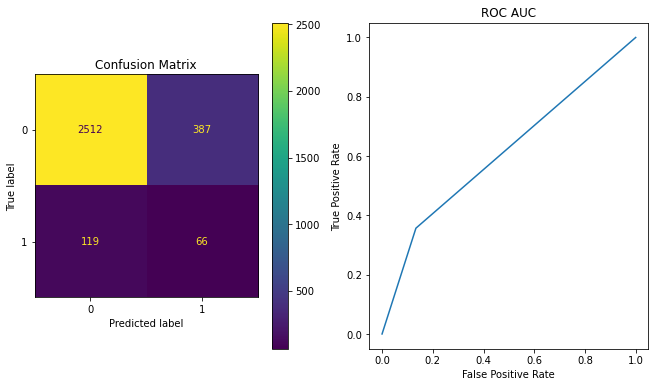

In [312]:
analysis_model_with_test('knn_clf_over', knn_clf, x_test, y_test)

#### Naive Bayes

In [313]:
# Gaussian NB
gaussian_nb_clf = make_pipeline(StandardScaler(),  GaussianNB())

In [314]:
gaussian_nb_clf.fit(x_over, y_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

Accuracy Score: 0.6901408450704225
F1 Score: 0.6490885416666666
Recall Score: 0.8597792342186961
Precision Score: 0.5213344488600711
ROC AUC: 0.7325540993030188


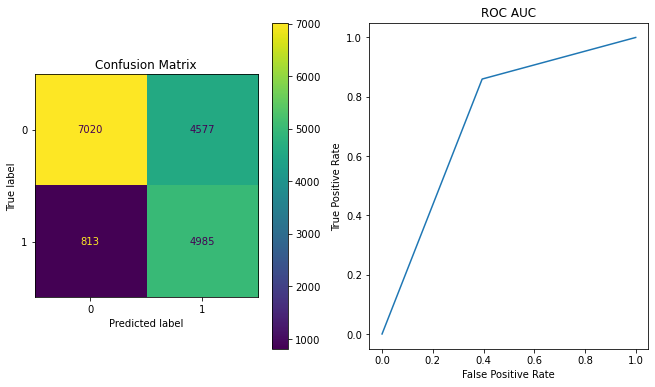

In [315]:
analysis_model_with_train('gaussian_nb_clf_over', gaussian_nb_clf, x_over, y_over)

Accuracy Score: 0.6332684824902723
F1 Score: 0.2216104611149346
Recall Score: 0.8702702702702703
Precision Score: 0.12697160883280756
ROC AUC: 0.7442072289605923


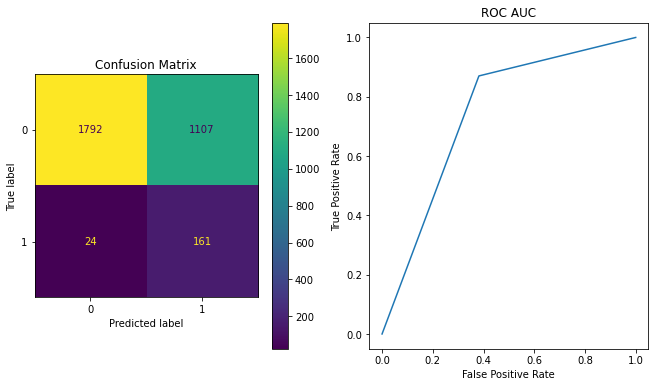

In [316]:
analysis_model_with_test('gaussian_nb_clf_over', gaussian_nb_clf, x_test, y_test)

In [317]:
# Bernoulli NB
ber_nb_clf = make_pipeline(StandardScaler(),  BernoulliNB())

In [318]:
ber_nb_clf.fit(x_over, y_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('bernoullinb', BernoulliNB())])

Accuracy Score: 0.7134233975280253
F1 Score: 0.5655773420479302
Recall Score: 0.5596757502587099
Precision Score: 0.5716047208032411
ROC AUC: 0.6749831713266473


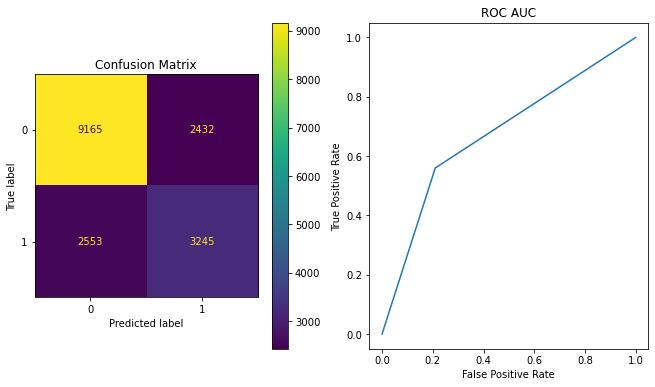

In [319]:
analysis_model_with_train('ber_nb_clf_over', ber_nb_clf, x_over, y_over)

#### Ada Boost

In [320]:
ada_clf = AdaBoostClassifier(n_estimators=300, learning_rate=0.5)

In [321]:
ada_clf.fit(x_over, y_over)

AdaBoostClassifier(learning_rate=0.5, n_estimators=300)

Accuracy Score: 0.7485484334578902
F1 Score: 0.6065839179708581
Recall Score: 0.581579855122456
Precision Score: 0.6338345864661654
ROC AUC: 0.7068026894824145


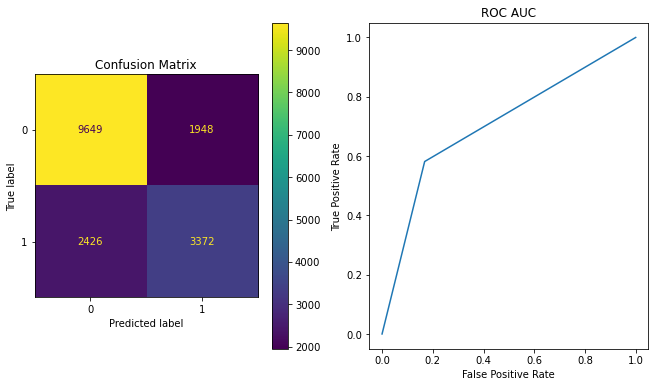

In [322]:
analysis_model_with_train('ada_clf_over', ada_clf, x_over, y_over)

Accuracy Score: 0.8054474708171206
F1 Score: 0.21465968586387432
Recall Score: 0.44324324324324327
Precision Score: 0.14162348877374784
ROC AUC: 0.6359024080997174


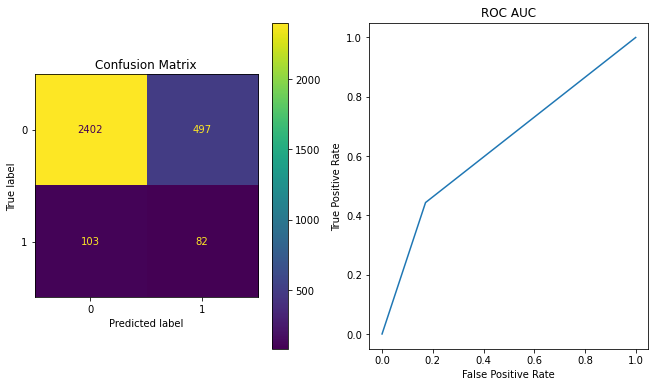

In [323]:
analysis_model_with_test('ada_clf_over', ada_clf, x_test, y_test)

#### Gradient Boosting

In [324]:
gb_clf = GradientBoostingClassifier()

In [325]:
gb_clf.fit(x_over, y_over)

GradientBoostingClassifier()

Accuracy Score: 0.8083357286576602
F1 Score: 0.7110918544194108
Recall Score: 0.707657813038979
Precision Score: 0.7145593869731801
ROC AUC: 0.7831640794090299


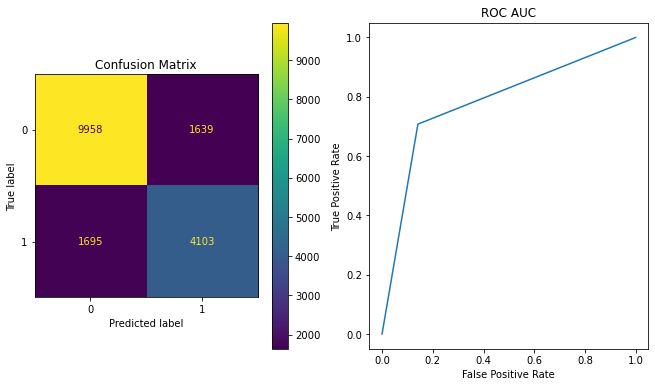

In [326]:
analysis_model_with_train('gb_clf_over', gb_clf, x_over, y_over)

Accuracy Score: 0.8294422827496758
F1 Score: 0.26536312849162014
Recall Score: 0.5135135135135135
Precision Score: 0.17890772128060264
ROC AUC: 0.6815584125001166


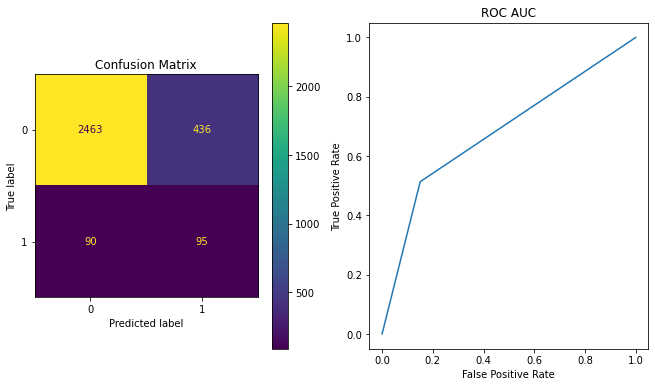

In [327]:
analysis_model_with_test('gb_clf_over', gb_clf, x_test, y_test)

#### XG Boost

In [328]:
xgb_clf = XGBClassifier()

In [329]:
xgb_clf.fit(x_over, y_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Accuracy Score: 0.9936188559931015
F1 Score: 0.9905071410245445
Recall Score: 0.9987926871334943
Precision Score: 0.9823579304495335
ROC AUC: 0.9949124253120262


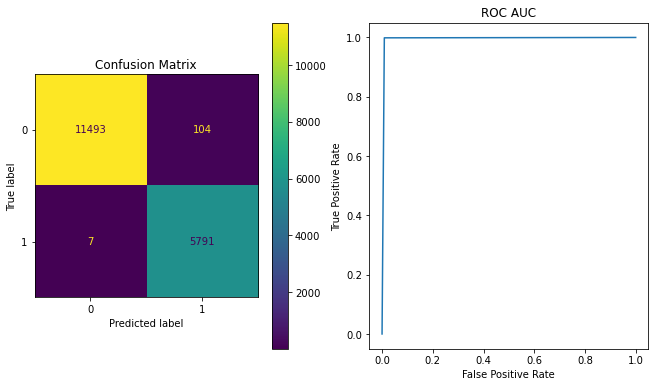

In [330]:
analysis_model_with_train('xgb_clf_over', xgb_clf, x_over, y_over)

Accuracy Score: 0.9914065666801783
F1 Score: 0.9328263624841571
Recall Score: 0.997289972899729
Precision Score: 0.8761904761904762
ROC AUC: 0.9941610681951435


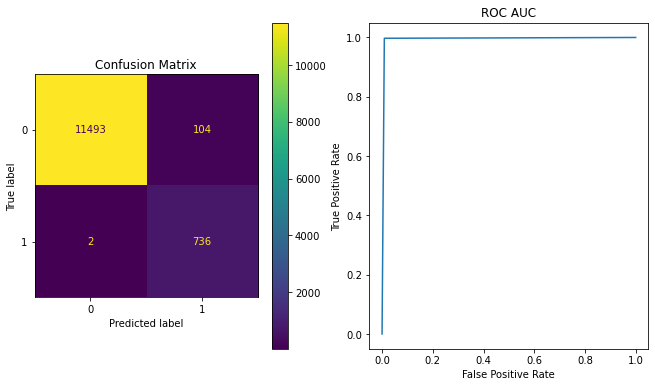

In [333]:
analysis_model_with_test('xgb_clf_over', xgb_clf, x_train, y_train)